In [59]:
%load_ext autoreload
%autoreload 2
import diverse_yeast_tools as dyt



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import ast

import json
import pickle

from Bio import SeqIO, pairwise2



import sys
# if not(base_dir in sys.path): 
#     sys.path.append(base_dir)
#     print("Added " + base_dir + " to path" )


yeast_esr_flag = input("Use yeast_esr_expression functions? (Y/n)")

if yeast_esr_flag =='Y':
    yeast_esr_exp_path = os.path.normpath('C:/Users/heineib/Documents/GitHub/yeast_esr_expression_analysis') + os.sep
    #io_library_path_core = io_library_path + 'core' + os.sep
    if not(yeast_esr_exp_path in sys.path):
        sys.path.append(yeast_esr_exp_path)
        print("Added " + yeast_esr_exp_path + " to path" )

    import yeast_esr_exp
    yeast_esr_exp.base_dir = yeast_esr_exp_path
    yeast_esr_exp.data_processing_dir = yeast_esr_exp_path + os.path.normpath('expression_data') + os.sep


y1000plus_tools_flag = input("Use y1000plus_tools functions? (Y/n)")

if y1000plus_tools_flag =='Y':
    y1000plus_tools_path = os.path.normpath('C:/Users/heineib/Documents/GitHub/y1000plus_tools') + os.sep
    #io_library_path_core = io_library_path + 'core' + os.sep
    if not(y1000plus_tools_path in sys.path):
        sys.path.append(y1000plus_tools_path)
        print("Added " + y1000plus_tools_path + " to path" )

    import y1000plus_tools
    y1000plus_tools.base_dir = os.path.normpath('C:/Users/heineib/Documents/GitHub/y1000plus_tools') + os.sep
    print("y1000plus_tools dir is " + y1000plus_tools.base_dir )                      
    y1000plus_tools.y1000plus_dir = y1000plus_tools.base_dir + 'data' + os.sep 
    print("y1000plus data dir is " + y1000plus_tools.y1000plus_dir)



    
#from venn import venn


genomes_base = os.path.normpath('G:/My Drive/Crick_LMS/external_data/genomes')
y1000plus_dir = os.path.normpath('C:/Users/heineib/Documents/GitHub/y1000plus_tools/data') + os.sep
base_dir = os.path.normpath('G:/My Drive/Crick_LMS/projects/diverse_yeasts')




#Load y1000 species table
y1000_species = pd.read_csv(y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/y1000_species_table.csv"), index_col=0)

#Load S.Cer lookup table: 
scer_lookup_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/saccharomyces_cerevisiae.csv')

scer_lookup = pd.read_csv(scer_lookup_fname, index_col=0)
scer_y1000_id_gene_id_lookup = dict(zip(scer_lookup['y1000_id'], scer_lookup.index))

spec_orig_genome_lookup = dict(zip(y1000_species['spec_og_id'], y1000_species['original_genome_id']))

protein_dir = os.path.normpath(y1000plus_dir + 'shen_2018_data/0_332yeast_genomes/332_genome_annotations/pep') + os.sep 

#Percentage of species that need to be present in the orthogroup in order to use the orthogroup. 
pct_present_thresh = 0.4


Use yeast_esr_expression functions? (Y/n) Y
Use y1000plus_tools functions? (Y/n) Y


y1000plus_tools dir is C:\Users\heineib\Documents\GitHub\y1000plus_tools\
y1000plus data dir is C:\Users\heineib\Documents\GitHub\y1000plus_tools\data\


In [48]:
sc_annotations_df = pd.read_csv(base_dir + os.sep + 'eggnog_mapper' + os.sep +  'annotation' + os.sep + 'yeastmine_annotation_summary_20211007.csv', index_col = 0)

scer_orf_table = pd.read_table(base_dir + os.sep + 'eggnog_mapper' + os.sep +  'annotation' + os.sep + 'yeastmine_orf_list_20211025.tsv', index_col=1, names= ['SGD_id', 'species', 'Name', 'full_name', 'qualifier', 'status'])

scer_orf_table_not_dub = scer_orf_table[scer_orf_table['qualifier'] != 'Dubious']

sc_annotations_orf = sc_annotations_df.loc[list(set(sc_annotations_df.index) & set(scer_orf_table_not_dub.index ))]

ec_counts = []
for eclist in sc_annotations_orf['EC number']: 
    if type(eclist)==float:
        assert np.isnan(eclist), 'Float but not NaN ' + eclist
        ec_counts.append(0)
    else: 
        eclist_list = ast.literal_eval(eclist)
        ec_counts.append(len(eclist_list))
        

print('{} s. cerevisiae proteins with an EC number'.format(sum(~(sc_annotations_orf['EC number'].isna()))))


## How many have a PDB annotation

print('{} s. cerevisiae proteins with a PDB id'.format(sum(~(sc_annotations_orf['PDB ID'].isna()))))

sc_annotations_ec_subset = sc_annotations_orf[~(sc_annotations_orf['EC number'].isna())]

print('{} s. cerevisiae proteins with and EC number and a PDB id'.format(sum(~(sc_annotations_ec_subset['PDB ID'].isna()))))

## How many have a pathway identified

sc_annotations_orf['N_pathways'] = [len(ast.literal_eval(pway_list)) for pway_list in sc_annotations_orf['Gene.pathways.name']]

sc_annotations_orf[sc_annotations_orf['N_pathways']>0]

# N_pathways_EC = pd.Series([len(ast.literal_eval(pway_list)) for pway_list in sc_annotations_ec_subset['Gene.pathways.name']])

print('{} s. cerevisiae proteins with a Pathway'.format(sum(sc_annotations_orf['N_pathways']>0)))

print('{} s. cerevisiae proteins with and EC number and a Pathway'.format(sum(((sc_annotations_orf['N_pathways']>0) & (~(sc_annotations_orf['EC number'].isna()))))))


sc_annotations_pway_subset = sc_annotations_orf[sc_annotations_orf['N_pathways']>0]



1373 s. cerevisiae proteins with an EC number
1083 s. cerevisiae proteins with a PDB id
299 s. cerevisiae proteins with and EC number and a PDB id
517 s. cerevisiae proteins with a Pathway
469 s. cerevisiae proteins with and EC number and a Pathway


In [49]:
#Proteins missing yeast EC number but which have a curated pathway
sc_annotations_orf[(sc_annotations_orf['N_pathways']>0) & sc_annotations_orf['EC number'].isna()]

#This list makes me think that we want the pathways and not to rely exclusively on EC numbers (since there are some potentially very interesting enzymes in here)

,Gene.symbol,Gene.secondaryIdentifier,Gene.name,Gene.pathways.identifier,Gene.pathways.name,EC number,LoQAtE ID,PANTHER ID,PDB ID,PDB ID Chain,Pathway ID,UniParc ID,UniProtKB ID,N_pathways
YFR044C,DUG1,YFR044C,Deficient in Utilization of Glutathione,"['PWY3O-114', 'PWYQT-4432']","['glutathione degradation', 'superpathway of g...",NaN,['1409'],['PTHR43270:SF4'],['4G1P'],['4G1P.A'],"['PWY3O-114', 'PWYQT-4432']",['UPI0000052F2D'],['P43616'],2
YJL166W,QCR8,YJL166W,ubiQuinol-cytochrome C oxidoReductase,['PWY3O-188'],"['aerobic respiration, electron transport chain']",NaN,['3620'],['PTHR12119:SF2'],"['1EZV', '1KB9', '1KYO', '1P84', '2IBZ', '3CX5...","['1EZV.G', '1KB9.H', '1KYO.H', '1KYO.S', '1P84...",['PWY3O-188'],['UPI000004F931'],['P08525'],1
YMR256C,COX7,YMR256C,Cytochrome c OXidase,['PWY3O-188'],"['aerobic respiration, electron transport chain']",NaN,['1190'],NaN,NaN,NaN,['PWY3O-188'],['UPI000004F95B'],['P10174'],1
YBR183W,YPC1,YBR183W,Yeast Phyto-Ceramidase,['SPHINGOLIPID-SYN-PWY-1'],['sphingolipid biosynthesis (yeast)'],NaN,['6524'],['PTHR46187:SF3'],NaN,NaN,['SPHINGOLIPID-SYN-PWY-1'],['UPI000013BD96'],['P38298'],1
YGR183C,QCR9,YGR183C,ubiQuinol-cytochrome C oxidoReductase,['PWY3O-188'],"['aerobic respiration, electron transport chain']",NaN,['3621'],['PTHR12980:SF0'],"['1EZV', '1KB9', '1KYO', '1P84', '2IBZ', '3CX5...","['1EZV.I', '1KB9.I', '1KYO.I', '1KYO.T', '1P84...",['PWY3O-188'],['UPI0000036CFF'],['P22289'],1
YMR202W,ERG2,YMR202W,ERGosterol biosynthesis,"['ERGOSTEROL-SYN-PWY-1', 'PWY-6075-1']","['ergosterol biosynthesis I', 'superpathway of...",NaN,['1516'],['PTHR10868:SF1'],NaN,NaN,"['ERGOSTEROL-SYN-PWY-1', 'PWY-6075-1', 'PWY3O-...",['UPI000012A142'],['P32352'],2
YBR003W,COQ1,YBR003W,COenzyme Q,"['HEXPPSYN-PWY-2', 'PWY3O-862']","['hexaprenyl diphosphate biosynthesis', 'super...",NaN,['1156'],['PTHR12001:SF69'],NaN,NaN,"['HEXPPSYN-PWY', 'HEXPPSYN-PWY-2', 'PWY3O-862']",['UPI0000127EF5'],['P18900'],2
YPL059W,GRX5,YPL059W,GlutaRedoXin,"['GLUT-REDOX2-PWY', 'PWY3O-592']","['glutathione-glutaredoxin redox reactions', '...",NaN,['1820'],['PTHR10293:SF16'],['3GX8'],['3GX8.A'],"['GLUT-REDOX2-PWY', 'PWY3O-592']",['UPI000013BD3B'],['Q02784'],2
YJL134W,LCB3,YJL134W,Long-Chain Base,['SPHINGOLIPID-SYN-PWY-1'],['sphingolipid biosynthesis (yeast)'],NaN,['2206'],['PTHR14969:SF28'],NaN,NaN,['SPHINGOLIPID-SYN-PWY-1'],['UPI000013B5EF'],['P47013'],1
YPL057C,SUR1,YPL057C,SUppressor of Rvs161 and rvs167 mutations,['SPHINGOLIPID-SYN-PWY-1'],['sphingolipid biosynthesis (yeast)'],NaN,['4510'],['PTHR32385:SF15'],NaN,NaN,['SPHINGOLIPID-SYN-PWY-1'],['UPI0000136233'],['P33300'],1


Text(0, 0.5, 'Frequency (Log scale)')

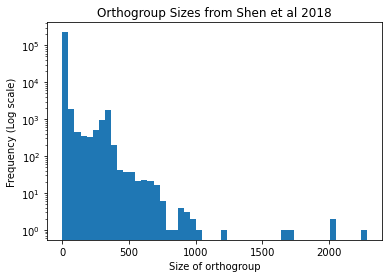

In [50]:
# Summarize size distribution of ortholog mappings: 
orthogroup_fname = y1000plus_dir + os.path.normpath("shen_2018_data/orthomcl_output/orthomcl_clusters.txt")

og_sizes = []

with open(orthogroup_fname, 'r') as f: 
    for line in f: 
        og_genes = line.split()
        og = og_genes[0].strip(':')
        genes = og_genes[1:]
        og_sizes.append(len(genes))
        
fig, ax = plt.subplots(1,1)

ax.hist(og_sizes, log=True, bins = 50)
ax.set_title('Orthogroup Sizes from Shen et al 2018')
ax.set_xlabel('Size of orthogroup')
ax.set_ylabel('Frequency (Log scale)')

In [51]:
# For a given S. cerevisiae protein, provide its og number
# Make mapping of S. cerevisiae proteins to orthogroups

# Species
spec_name = 'Saccharomyces cerevisiae'

#y1000_species = pd.read_csv(y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/y1000_species_table.csv"), index_col=0)

spec_id = y1000_species[y1000_species['Species name']==spec_name]['spec_og_id'].values[0]

spec_og_mapping = {}
with open(orthogroup_fname, 'r') as f: 
    for line in f: 
        og_genes = line.split()
        og = og_genes[0].strip(':')
        genes = og_genes[1:]
        
        gene_ids = [gene_id for gene_id in genes if int(gene_id.split('_')[0])==spec_id]
        
        if len(gene_ids) >= 1:
            for gene_id in gene_ids: 
                spec_og_mapping[gene_id] = og

                
og_set = []

for sc_genename in sc_annotations_pway_subset.index:   #sc_annotations_ec_subset.index: 
    #sc_genename = 'YER144C'
    y1000_id = scer_lookup.loc[sc_genename, 'y1000_id']
    og_in = spec_og_mapping[y1000_id]
    og_set.append(og_in)
    
og_set = list(set(og_set))

print('{} orthogroups contain S. cerevisiae genes with SGD curated pathway'.format(len(og_set)))

445 orthogroups contain S. cerevisiae genes with SGD curated pathway


In [31]:
species_set = pd.read_csv(os.path.normpath(base_dir + '/alphafold/species_selection.csv'), index_col = 0)

In [32]:
species_set

,Time_tree_name,spec_og_id,Alphafold_structures,Experimental_data,Major clade,Load,Uniprot,Notes
Species name,,,,,,,,
Saccharomyces cerevisiae,Saccharomyces_cerevisiae,110.0,old,Y,Saccharomycetaceae,Y,NaN,"Post WGH, Have wild and lab strain"
Debaryomyces hansenii,Debaryomyces_hansenii,36.0,new,Y,CUG-Ser1,Y,UP000000599,NaN
Wickerhamomyces anomalus,Wickerhamomyces_anomalus,139.0,new,Y,Phaffmycetaceae,Y,UP000094112,NaN
Lachancea thermotolerans,Lachancea_thermotolerans,64.0,new,Y,Saccharomycetaceae,Y,UP000002036,KLE
Kazachstania servazzii,Kazachstania_servazzii,NaN,no,Y,Saccharomycetaceae,N,NaN,"Post WGH, only have our own genome"
Kazachstania naganishii,Kazachstania_naganishii,49.0,new,N,Saccharomycetaceae,Y,NaN,Post WGH
Kluyveromyces marxianus,Kluyveromyces_marxianus,51.0,new,Y,Saccharomycetaceae,Y,UP000065495,KLE
Hanseniaspora osmophila,Hanseniaspora_osmophila,247.0,new,Y,Saccharomycodaceae,Y,UP000095728,NaN
Geotrichum candidum,Geotrichum_candidum,43.0,new,Y,Dipodascaceae / Trichomonascaceae,Y,NaN,NaN


In [40]:
#species_set = pd.read_table(os.path.normpath(base_dir + '/alphafold/species_selection.txt'), index_col = 0)
#Species name	Time_tree_name	original_genome_id	Abbreviation	spec_og_id	Alphafold_structures	Long_read_seqs	Experimental_data	Major clade	Load	Uniprot Proteome	CUG usage	Notes	Sequence source for Alphafold	Sequence Source for Trees	Genome Sequence for Uniprot

species_set = pd.read_csv(os.path.normpath(base_dir + '/alphafold/species_selection.csv'), index_col = 0)
species_set_filt = species_set.loc[species_set['Load']=='Y']

spec_id_map = {}
time_tree_names = []
for spec_fullname, (time_tree_name, spec_orig, spec_abbrev, spec_og_id, alphafold_structures,long_read_flag, experimental_data, clade, load_flag, uniprot, cug_usage, notes, seq_source_af, seq_source_trees, uniprot_genome) in species_set[species_set['Load']=='Y'].iterrows():
    y1000_spec_lookup = y1000_species[y1000_species['original_genome_id']==spec_orig]
    clade_true = y1000_spec_lookup['Major clade'].values[0]
    assert clade_true==clade, 'Clade mismatch: {}, true spelling: {}, bad spelling: {}'.format(spec_fullname, clade_true, clade)
    spec_id = y1000_spec_lookup['spec_og_id'].values[0]
    assert spec_og_id == spec_id, 'OG id mismatch: {}, from species selection table: {}, from original database: {}'.format(spec_fullname, spec_og_id, spec_id)
    spec_id_map[int(spec_og_id)] = spec_orig
    time_tree_names.append(time_tree_name)
    
# spec_ids = set([str(spec_id_int) for spec_id_int in spec_id_map.keys()])

In [ ]:
tree_fname = y1000plus_dir + 'shen_2018_data' + os.sep + '332_2408OGs_time-calibrated_phylogeny_species-names_updated.newick'
t = y1000plus_tools.Tree(tree_fname)

ts = y1000plus_tools.TreeStyle()
ts.show_leaf_name = False
#ts.show_branch_length = True

# for node in t.traverse():
#     if not(node.is_leaf()):
#         node_label = TextFace(node.name)
#         node.add_face(node_label, column=1, position = "branch-bottom")

# post_WGH_colors = {'low':  '#8cc3f6', # '#d3d3fe', #'#3192ff',#'#7eeaf7', ##2DD7ED',      #'#e6fcff', 
#                    'high': '#fcbba1'} #'#59E3EB'}  #'#ffebe6'}


# node_color_dict = {'KLE':"#deb9f6",
#                    'ZT': "YellowGreen",
#                    'Post_WGH': "LightYellow",   #default color for post WGH
#                    'low': '#8cc3f6',    #syntenic orthologs of low LFC ohnolog
#                    'high': '#fcbba1',    #syntenic orthologs of high LFC ohnolog
#                    'outgroup': 'LightGrey'
#                   }

#K.lactis, K. marxianus, K. servazzii, W.anomalus, P.pastoris, C.albicans, C.tropicalis, D.hansenii, G.candidus, R.mucilaginosa, S.pombe, S.cerevisiae


# leaves_to_view = {'Geotrichum_candidum':('outgroup', 'Ylip'),
#                   'Komagataella_pastoris': ('outgroup','Kpas'),
#                   'Debaryomyces_hansenii': ('outgroup','Dhan'),
#                   'Candida_albicans': ('outgroup','Calb'),
#                   'Candida_tropicalis': ('outgroup','Ctro'),
#                   'Wickerhamomyces_anomalus': ('outgroup', 'Wano'), 
#                  'Lachancea_thermotolerans':  ('KLE','Lthe'),
#                   'Kluyveromyces_lactis': ('KLE','Klac'),
#                   'Kluyveromyces_marxianus': ('KLE','Kmar'),
#                   'Zygosaccharomyces_rouxii': ('ZT', 'Zrou'),
#                   'Kazachstania_naganishii': ('Post_WGH','Knag'),
#                   'Saccharomyces_cerevisiae': ('Post_WGH','Scer')

#                  }


#t.prune(leaves_to_view.keys())

t.prune(time_tree_names)

t.ladderize()

t.write(outfile=base_dir + os.sep + 'alphafold' + os.sep + 'species_selection.nw')

for node in t.get_leaves():
    name = node.name
    #group, abbrev = leaves_to_view[name]
    
#     nstyle = NodeStyle()
#     node_color = node_color_dict[group]
#     nstyle['bgcolor']=node_color
#     node.set_style(nstyle)
    
    node_label_face = y1000plus_tools.TextFace(name) # + " ({})".format(abbrev)) #, fsize=16, fgcolor="black")
    node.add_face(node_label_face, column=1, position = "aligned")

fname = base_dir + os.sep + 'alphafold' + os.sep + 'species_selection.svg'
t.render(fname, tree_style=ts)
#t.render('%%inline', tree_style=ts)


In [41]:
spec_id_map

{110: 'saccharomyces_cerevisiae',
 36: 'debaryomyces_hansenii',
 139: 'wickerhamomyces_anomalus',
 64: 'lachancea_thermotolerans',
 49: 'kazachstania_naganishii',
 51: 'kluyveromyces_marxianus',
 247: 'yHMPu5000034957_hanseniaspora_osmophila_160519',
 43: 'geotrichum_candidum',
 342: 'zygosaccharomyces_rouxii',
 12: 'candida_albicans',
 30: 'candida_tropicalis',
 50: 'kluyveromyces_lactis',
 52: 'komagataella_pastoris',
 121: 'schizosaccharomyces_pombe',
 136: 'vanderwaltozyma_polyspora',
 135: 'torulaspora_delbrueckii',
 40: 'eremothecium_gossypii',
 6: 'ascoidea_rubescens',
 35: 'cyberlindnera_jadinii',
 104: 'ogataea_parapolymorpha',
 106: 'pachysolen_tannophilus',
 170: 'yHMPu5000034604_sporopachydermia_lactativora_160519',
 0: 'alloascoidea_hylecoeti',
 13: 'candida_apicola',
 144: 'yarrowia_lipolytica',
 134: 'tortispora_caseinolytica',
 66: 'lipomyces_starkeyi'}

In [55]:

# For a given set of species, and a given orthogroup, extract orthogroup genes

og_out_data = {}  # (N_genes, pct_present, og_genes_out)

for og_in in og_set: 

    with open(orthogroup_fname, 'r') as f: 
        for line in f: 
            og_genes = line.split()
            og = og_genes[0].strip(':')

            if og==og_in: 
                genes = og_genes[1:]
                og_genes_out = []
                for gene in genes: 
                    spec_id = gene.split('_')[0]
                    if spec_id in spec_ids: 
                        og_genes_out.append(gene)

    
    #Calculate the percentage of species contained in the orthogroup.
    og_genes_out_specs = [og_gene.split('_')[0] for og_gene in og_genes_out]
    pct_present = len(set(og_genes_out_specs))/len(spec_ids)

    #Extract Fastas for the orthogroups.  
    
    og_out_data[og_in] = (len(og_genes_out), pct_present, og_genes_out)


# Save og_out_data
og_unfiltered_fname = base_dir + os.sep + 'alphafold' + os.sep + 'og_genes_unfiltered.json'

with open(og_unfiltered_fname, 'w') as f:
    json.dump(og_out_data, f, sort_keys=True, indent=4 )

In [30]:
#Load og_out_data
og_unfiltered_fname = base_dir + os.sep + 'alphafold' + os.sep + 'og_genes_unfiltered.json'
with open(og_unfiltered_fname, 'r') as f:
    og_out_data = json.load(f) 

In [57]:
pct_present_list = []
#pct_present_thresh = 0.4
og_out_data_filt = {}
total_genes = 0
for og, (N_genes, pct_present, og_genes_out) in og_out_data.items():
    pct_present_list.append(pct_present)
    if pct_present > pct_present_thresh: 
        og_out_data_filt[og] = (N_genes, pct_present, og_genes_out)
        total_genes = total_genes + N_genes
        
print('{} total genes in {} orthogroups'.format(total_genes, len(og_out_data_filt)))

# Save filtered og_out_data

og_fname = base_dir + os.sep + 'alphafold' + os.sep + 'og_genes.json'

with open(og_fname, 'w') as f:
    json.dump(og_out_data_filt, f, sort_keys=True, indent=4 )

11569 total genes in 426 orthogroups


In [58]:
#Load og_out_data_filt
og_fname = base_dir + os.sep + 'alphafold' + os.sep + 'og_genes.json'
with open(og_fname, 'r') as f:
    og_out_data_filt = json.load(f) 

In [59]:
#Make fastas for all proteins without filtering out S. cer and C. albicans using shen genomes.  
fasta_out_fname = base_dir + os.sep + 'alphafold' + os.sep + 'all_proteins.fasta'

source = 'shen_2018'

#lists of gene_full names for each species
gene_full_sets = {}

with open(fasta_out_fname, 'w') as f_out: 

    #for each species: 
    for spec_id, spec_name in spec_id_map.items(): 

        spec = spec_id_map[spec_id]

        spec_orig_genome = spec_orig_genome_lookup[spec_id]
        
        if spec_orig_genome == 'saccharomyces_cerevisiae':
            protein_fname = y1000plus_dir + os.path.normpath('shen_2018_data/0_332yeast_genomes/332_genome_annotations/Saccharomyces_cerevisiae_S288C_protein.fasta')
        elif spec_orig_genome == 'candida_albicans': 
            protein_fname = y1000plus_dir + os.path.normpath('shen_2018_data/0_332yeast_genomes/332_genome_annotations/Candida_albicans_SC5314_A22_current_default_protein.fasta')
        else: 
            protein_fname = protein_dir + spec_orig_genome + '.max.pep'
        seq_records = SeqIO.parse(protein_fname, "fasta")
        
        spec_lookup_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/' + spec_orig_genome + '.csv')

        spec_lookup = pd.read_csv(spec_lookup_fname, index_col=0)
        
        if spec_orig_genome == 'saccharomyces_cerevisiae':
            #for S. cerevisiae the orf name is the 'gene_full'
            gene_full_y1000_id_lookup = dict(zip(spec_lookup['y1000_id'], spec_lookup.index))
        else: 
            gene_full_y1000_id_lookup = dict(zip(spec_lookup['y1000_id'], spec_lookup['gene_full']))

        
        
        #for each orthogroup:
        #extract protein seq if it comes from the right species.
        
        #gene_full: (y1000_id, og)
        seqs_to_get = {}
        gene_full_set = []
        for og, (N_genes, pct_present, og_genes_out) in og_out_data.items():
            for y1000_id in og_genes_out: 
                spec_id_check = int(y1000_id.split('_')[0])
                if spec_id_check==spec_id:
                    gene_full = gene_full_y1000_id_lookup[y1000_id]
                    seqs_to_get[gene_full] = (y1000_id, og)
                    gene_full_set.append(gene_full)
        
        gene_full_sets[spec_orig_genome] = gene_full_set
        
        for seq_record in seq_records:
            #gene_full = 'augustus_masked-Deha2C-processed-gene-4.36'
            if spec_orig_genome == 'saccharomyces_cerevisiae':
                gene_full_check = seq_record.description.split()[0] #SC specific
            elif spec_orig_genome == 'candida_albicans': 
                gene_full_check = seq_record.description
            else: 
                gene_full_check = seq_record.description.split()[1].split('=')[1]
            #print(gene_full)
            if (gene_full_check in gene_full_set):
                ##find which y1000_id was matched
                #y1000_rlookup = genes_lookup['gene_full'] == gene_full
        #         for gene, tf in y1000_rlookup.items(): 
        #             if tf:
        #                 y1000_id=gene
        #         gene_id = genes_lookup.loc[y1000_id, 'gene_id']
                
                (y1000_id, og) = seqs_to_get[gene_full_check]
                protein_seq = seq_record.seq
                f_out.write('>' + spec_orig_genome + '__' + og + '__' + y1000_id + ' gene_full=' + gene_full_check +
                        ' source=' + source + '\n')
                f_out.write(str(protein_seq) + '\n')  #I wonder why some of the bases were in lower case





In [ ]:
# #Find matches comparing shen and uniprot proteome. 

# #Only need to redo this if you are re-calculating pairwise_scores

# shen_proteome_dir = os.path.normpath(y1000plus_dir + 'shen_2018_data/0_332yeast_genomes/332_genome_annotations/pep') + os.sep 
# uniprot_proteome_dir = os.path.normpath('C:/Users/heineib/Google Drive/Crick_LMS/external_data/genomes/diverse_strains/proteomes') + os.sep 

# #(orig_genome ame: (shen_fname, uniprot_fname)): 
# proteome_fasta_dict = {'kluyveromyces_lactis': {'shen': shen_proteome_dir + 'kluyveromyces_lactis.max.pep', 
#                                                 'uniprot': uniprot_proteome_dir + 'Klac_uniprot-proteome_UP000000598.fasta'
#                                                }, 
#                        'wickerhamomyces_anomalus': {'shen': shen_proteome_dir + 'wickerhamomyces_anomalus.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Wano_uniprot-proteome_UP000094112.fasta'
#                            }, 
#                        'lachancea_thermotolerans': {'shen': shen_proteome_dir + 'lachancea_thermotolerans.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Lthe_uniprot-proteome_UP000002036.fasta'
#                            }, 
#                        'komagataella_pastoris': {'shen': shen_proteome_dir + 'komagataella_pastoris.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Kpas_uniprot-proteome_UP000000314.fasta'
#                            }, 
#                         'candida_tropicalis': {'shen': shen_proteome_dir + 'candida_tropicalis.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Ctro_uniprot-proteome_UP000002037.fasta'
#                            },
#                         'debaryomyces_hansenii': {'shen': shen_proteome_dir + 'debaryomyces_hansenii.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Dhan_uniprot-proteome_UP000000599.fasta'
#                            }, 
#                         'yHMPu5000034957_hanseniaspora_osmophila_160519': {'shen': shen_proteome_dir + 'yHMPu5000034957_hanseniaspora_osmophila_160519.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Hosm_uniprot-proteome_UP000095728.fasta'
#                            }, 
#                         'kluyveromyces_marxianus': {'shen': shen_proteome_dir + 'kluyveromyces_marxianus.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Kmar_uniprot-proteome_UP000065495.fasta'
#                            }, 
#                         'zygosaccharomyces_rouxii': {'shen': shen_proteome_dir + 'zygosaccharomyces_rouxii.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Zrou_uniprot-proteome_UP000008536.fasta'
#                            }
#                       }

# study1 = 'shen'
# study2 = 'uniprot'

# match_points = 1
# mismatch_points = -1
# gap_open = -.5
# gap_extension = -0.1
# NN_top_scores = 5
# penalize_end_gaps = True 


# pairwise_scores = {}
# spec_orig_genomes = list[proteome_fasta_dict.keys()]#[ 'yHMPu5000034957_hanseniaspora_osmophila_160519']  #'zygosaccharomyces_rouxii','kluyveromyces_marxianus','candida_tropicalis', 'debaryomyces_hansenii',

# for spec_orig_genome in spec_orig_genomes:
#     print(spec_orig_genome)
#     #spec_orig_genome = 'komagataella_pastoris'# 'lachancea_thermotolerans' #'wickerhamomyces_anomalus' # 'kluyveromyces_lactis'

#     use_subset = True
#     subset = set(gene_full_sets[spec_orig_genome])
#     pairwise_score_loaded = False #if you have already saved some and want to do the rest

#     # #Check timing with time module
#     # #python parallel programming library
#     # #ipy_parallel dask
#     # #https://ipyparallel.readthedocs.io/en/stable/development/messages.html#parallel-messages

#     # #All by all pairwise sequence alignment, output top NN results

#     genenames_study1 = []
#     AA_seqs_study1 = SeqIO.parse(proteome_fasta_dict[spec_orig_genome][study1], "fasta")
#     for seq_study1 in AA_seqs_study1: 
#         genename_study1 = dyt.gene_id_retrieve(study1, seq_study1)
#     #     if spec=='Smik': 
#     #         genename_study1_dash = genename_study1
#     #         genename_study1 = 'smik' + genename_study1_dash.split('smik_')[1]
#         genenames_study1.append(genename_study1)

#     if use_subset: 
#         print('Using Subset genes')
#     else: 
#         subset = set(genenames_study1)

#     if pairwise_score_loaded: 
#         genes_to_search = ((subset & set(genenames_study1)) - set(pairwise_score.keys()))
#     else: 
#         pairwise_score = {}
#         genes_to_search = (subset & set(genenames_study1))


#     AA_seqs_study1 = SeqIO.parse(proteome_fasta_dict[spec_orig_genome][study1], "fasta")


#     N = len(genes_to_search)
#     for seq_study1 in AA_seqs_study1: 
#         check_gene = False
#         genename_study1 = dyt.gene_id_retrieve(study1, seq_study1)
#     #     if spec=='Smik': 
#     #         genename_study1_dash = genename_study1
#     #         genename_study1 = 'smik' + genename_study1_dash.split('smik_')[1]
#         if genename_study1 in genes_to_search:
#             check_gene = True

#         if check_gene: 
#             print(str(N) + ' ' + genename_study1)
#             AA_seqs_study2 = SeqIO.parse(proteome_fasta_dict[spec_orig_genome][study2], "fasta")
#             pairwise_score_comps = {}
#             for seq_study2 in AA_seqs_study2: 
#                 genename_study2 = seq_study2.id
#                 score = pairwise2.align.globalms(seq_study2,seq_study1, match_points, mismatch_points, gap_open, gap_extension, penalize_end_gaps = penalize_end_gaps, score_only = True )
#                 pairwise_score_comps[genename_study2] = score
#             pairwise_score_comps_df = pd.Series(pairwise_score_comps)
#             pairwise_score[genename_study1] = pairwise_score_comps_df.sort_values(ascending=False).iloc[0:NN_top_scores]
#             #print(pairwise_score[genename_YGOB])
#             N = N - 1

#     pairwise_scores[spec_orig_genome] =  pairwise_score

In [23]:
##Load pairwise scores

pairwise_scores_fname = base_dir + os.sep + 'alphafold' + os.sep + 'pairwise_scores.pkl'

# # Save pairwise_scores
# with open(pairwise_scores_fname, 'wb') as f:
#     pickle.dump(pairwise_scores, f)

# Load pairwise_scores
with open(pairwise_scores_fname, 'rb') as f: 
    pairwise_scores = pickle.load(f)

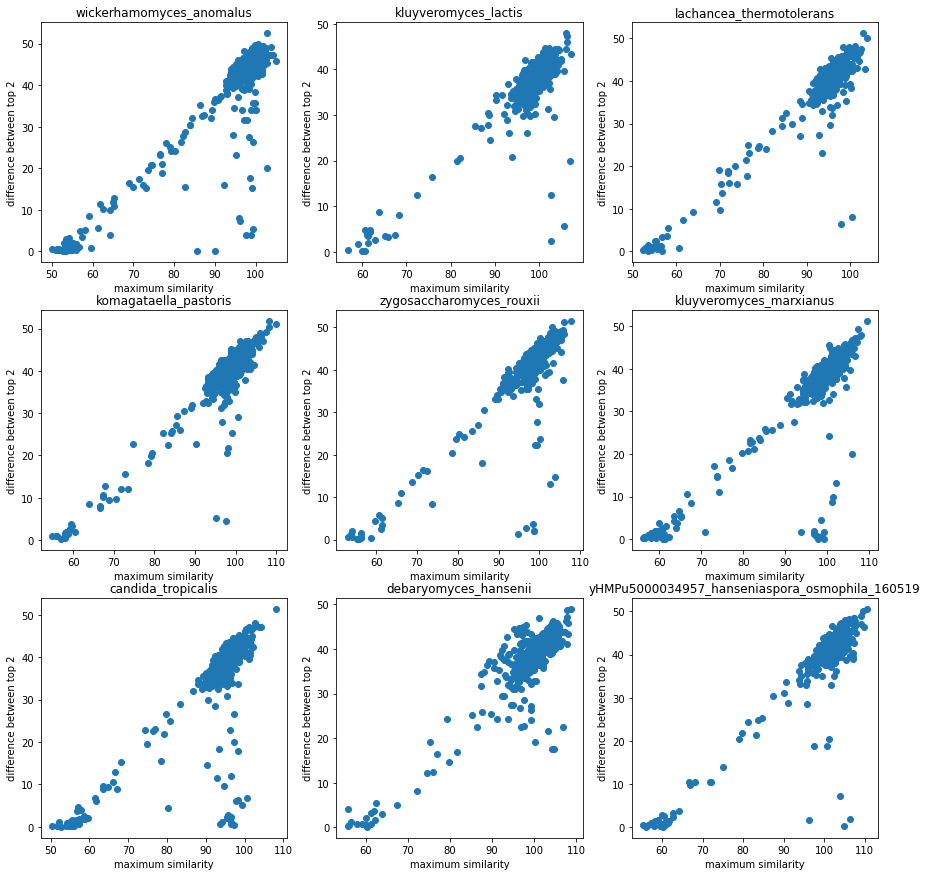

In [66]:
## Show histogram of the pairwise scores and use it to choose thresholds: 

fig, axarr = plt.subplots(3,3, figsize=(15,15))

#pairwise_scores = {}
#for jj, spec in enumerate(['Ncas','Klac','Smik']):

#pairwise_score_fname = data_processing_dir + os.path.normpath("ortholog_files_YGOB/AA_lists/" + spec + "_pairwise_score.pkl")

#with open(pairwise_score_fname,'rb') as file: 
#    pairwise_score= pickle.load(file)

#pairwise_scores[spec] = pairwise_score
#Use histogram to choose thresholds

for jj, (spec_orig_genome, pairwise_score) in enumerate(pairwise_scores.items()):
    ax = axarr.flatten()[jj]
    maxvals = []
    diff_top2 = []
    for genename_shen, options in pairwise_score.items(): 
        options_sorted = options.sort_values()
        #idxmax = options.idxmax()
        maxval = options_sorted[-1]
        diff_top2_val = maxval-options_sorted[-2]
        diff_top2.append(diff_top2_val)
        maxvals.append(maxval)
        #if maxval<90: 
        #if (maxval>90) & (diff_top2_val<20):
        #   print('{}, maxval: {}, difference: {}'.format(genename_shen,maxval,diff_top2_val))

    
    ax.scatter(maxvals, diff_top2)
    ax.set_title(spec_orig_genome)
    ax.set_xlabel('maximum similarity')
    ax.set_ylabel('difference between top 2')
    #ax.set_title(spec)

In [ ]:
# if genome_name == 'saccharomyces_cerevisiae':
#     #load gene_id map based on the species
#     gene_lookup_spec_fname = y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/id_lookups/" + genome_name + '.csv')
#     gene_lookup_spec = pd.read_csv(gene_lookup_spec_fname, index_col='y1000_id')

#     protein_fname = y1000plus_dir + os.path.normpath('shen_2018_data/0_332yeast_genomes/332_genome_annotations/Saccharomyces_cerevisiae_S288C_protein.fasta')

#     seq_records = SeqIO.parse(protein_fname, "fasta")

#     genes_lookup = gene_lookup_spec.loc[genes]
#     genes_lookup_set = set(gene_lookup_spec.loc[genes,'gene_id'].values)  #SC specific

#     for seq_record in seq_records:
#         gene_id = seq_record.description.split()[0] #SC specific
#         #print(gene_full)
#         if (gene_id in genes_lookup_set):
#             #find which y1000_id was matched
#             y1000_rlookup = (genes_lookup['gene_id'] == gene_id)
#             for gene, tf in y1000_rlookup.items(): 
#                 if tf:
#                     y1000_id=gene
#             protein_seq = seq_record.seq
#             f.write('>' + genome_name + '_' + gene_id + ' y1000_id=' + y1000_id + ' gene_id=' + gene_id +
#                     ' common_name=' + seq_record.description.split()[1] + #this adds in the cds from the original description
#                     '\n')
#             f.write(str(protein_seq) + '\n')  #I wonder why some of the bases were in lower case

In [67]:
# Get Orthogroup metadata
#Cycle through each protein. 

#Record Metadata

#OG Metadata: 
# SC Genenames, SP genenames, CA genenames
# Total number
# Percent of species covered
#Possible future
# Pathways
# Enzyme numbers

#{og: N_genes, pct_spec, og_genes, pathways, enzyme_numbers, sc_genenames, sc_names, sp_genename, ca_genename}

scer_spec_id = 110

#Build lookup table from S. pombe to S. cerevisiae
sp_orth_map_fname = os.path.normpath('C:/Users/heineib/Google Drive/Crick_LMS/external_data/genomes/spom/cerevisiae-orthologs.txt')
sp_orth_map = pd.read_table(sp_orth_map_fname, skiprows=1, header=None, names=['Spom','Scer'])
scer_spom_lookup = {}
none_list = []
for row, (spom_gene, scer_genes) in sp_orth_map.iterrows():
    if scer_genes=='NONE': 
        none_list.append(spom_gene)
    else:
        scer_genes_list = scer_genes.split('|')
        for scer_gene in scer_genes_list: 
            scer_spom_lookup[scer_gene] = spom_gene

#build C. albicans lookup table 
ca_orth_map_fname = os.path.normpath('C:/Users/heineib/Google Drive/Crick_LMS/external_data/genomes/calb/C_albicans_SC5314_S_cerevisiae_orthologs.txt')
ca_orth_map = pd.read_table(ca_orth_map_fname, skiprows=8, header=None, names = ['cg_name', 'cgd_id', 'sc_genename', 'sc_name', 'sgd_id']) #, names=['Spom','Scer'])
scer_calb_lookup = dict(zip(ca_orth_map['sc_genename'], ca_orth_map.index))

            
            
og_out_data_full = {}
jj = 0
for (og, (N_genes, pct_spec, og_genes)) in og_out_data.items():
    #print(og + ' ' + str(jj))
    og_out_data_full_item = {}
    og_out_data_full_item['N_genes'] = N_genes
    og_out_data_full_item['pct_spec'] = pct_spec
    og_out_data_full_item['og_genes'] = og_genes
    if  pct_spec>pct_present_thresh:
        og_out_data_full_item['pass_species_filter'] = True
    else: 
        og_metadata_full_item['pass_species_filter'] = False
        
    #get_sc_genes
    sc_genes = []
    for og_gene in og_genes: 
        spec_id_check = int(og_gene.split('_')[0])
        if spec_id_check==scer_spec_id:
            sc_genes.append(scer_y1000_id_gene_id_lookup[og_gene])
    
    #get pathway and EC annotations
    og_out_data_full_item['sc_genes'] = sc_genes
    og_out_data_full_item['sc_names'] = yeast_esr_exp.SC_common_name_lookup(sc_genes)
    og_out_data_full_item['pathways_id'] = list(sc_annotations_orf.loc[sc_genes]['Gene.pathways.identifier'])
    og_out_data_full_item['pathways_name'] = list(sc_annotations_orf.loc[sc_genes]['Gene.pathways.name'])
    og_out_data_full_item['EC_number'] = list(sc_annotations_orf.loc[sc_genes]['EC number'])
    og_out_data_full_item['PDB_ID'] = list(sc_annotations_orf.loc[sc_genes]['PDB ID'])  #Need to convert NaN in these to 'NULL' to work with R's JSON import also see https://jsonlint.com/
    
    #get sp_genes
    sp_genes = []
    ca_genes = []
    for sc_gene in sc_genes: 
        if sc_gene in scer_spom_lookup.keys(): 
            sp_genes.append(scer_spom_lookup[sc_gene])
        else: 
            sp_genes.append('NONE')
        
        if sc_gene in scer_calb_lookup.keys(): 
            ca_genes.append(scer_calb_lookup[sc_gene])
        else: 
            ca_genes.append('NONE')
    
    og_out_data_full_item['spom_genes'] = sp_genes
    og_out_data_full_item['calb_genes'] = ca_genes
    
    
    og_out_data_full[og] = og_out_data_full_item
    jj = jj + 1




In [125]:
# Save og_out_data_full (or metadata file)
og_out_data_full_fname = base_dir + os.sep + 'alphafold' + os.sep + 'og_metadata.json'

with open(og_out_data_full_fname, 'w') as f:
    json.dump(og_out_data_full, f, indent=4 )

In [2]:
#Load og_out_data_filt
og_fname = base_dir + os.sep + 'alphafold' + os.sep + 'og_metadata.json'
with open(og_fname, 'r') as f:
    og_out_data_full = json.load(f) 

In [ ]:
### Rebuild selected_proteins to fix source issue. 

In [63]:
#Build Fasta file

fasta_out_fname = base_dir + os.sep + 'alphafold' + os.sep + 'selected_proteins.fasta'

#the following information is in the fasta header for each protein
#<spec_orig_genome>__<og>__<y1000_id>: you can use this to look up other metadata in the og_metadata.json file
#source:  The source of the peptide sequence (either 'shen' or 'uniprot')
#gene_full:  The full name of the gene from source peptide file
#gene_full_shen: the full name of the gene from the shen peptide file
#L: Length of the gene
#sim_score_vs_shen: The similarity score between the shen peptide sequence and the uniprot peptide sequence.  If it is above the threshold, the uniprot sequence is used, below the threshold, we continue to use the shen sequence
#sim_score_vs_shen_diff: The difference between similarity score of the top peptide and the second highest scoring peptide.  For genes with similarity score below a threshold, if this difference is too small, we keep the shen sequence

shen_proteome_dir = os.path.normpath(y1000plus_dir + 'shen_2018_data/0_332yeast_genomes/332_genome_annotations/pep') + os.sep 
uniprot_proteome_dir = os.path.normpath('C:/Users/heineib/Google Drive/Crick_LMS/external_data/genomes/diverse_strains/proteomes') + os.sep 

#(species genome name: (shen_fname, uniprot_fname)): 
proteome_fasta_dict = {'kluyveromyces_lactis': {'shen': shen_proteome_dir + 'kluyveromyces_lactis.max.pep', 
                                                'uniprot': uniprot_proteome_dir + 'Klac_uniprot-proteome_UP000000598.fasta'
                                               }, 
                       'wickerhamomyces_anomalus': {'shen': shen_proteome_dir + 'wickerhamomyces_anomalus.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Wano_uniprot-proteome_UP000094112.fasta'
                           }, 
                       'lachancea_thermotolerans': {'shen': shen_proteome_dir + 'lachancea_thermotolerans.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Lthe_uniprot-proteome_UP000002036.fasta'
                           }, 
                       'komagataella_pastoris': {'shen': shen_proteome_dir + 'komagataella_pastoris.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Kpas_uniprot-proteome_UP000000314.fasta'
                           }, 
                        'candida_tropicalis': {'shen': shen_proteome_dir + 'candida_tropicalis.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Ctro_uniprot-proteome_UP000002037.fasta'
                           },
                        'debaryomyces_hansenii': {'shen': shen_proteome_dir + 'debaryomyces_hansenii.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Dhan_uniprot-proteome_UP000000599.fasta'
                           }, 
                        'yHMPu5000034957_hanseniaspora_osmophila_160519': {'shen': shen_proteome_dir + 'yHMPu5000034957_hanseniaspora_osmophila_160519.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Hosm_uniprot-proteome_UP000095728.fasta'
                           }, 
                        'kluyveromyces_marxianus': {'shen': shen_proteome_dir + 'kluyveromyces_marxianus.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Kmar_uniprot-proteome_UP000065495.fasta'
                           }, 
                        'zygosaccharomyces_rouxii': {'shen': shen_proteome_dir + 'zygosaccharomyces_rouxii.max.pep',
                            'uniprot': uniprot_proteome_dir + 'Zrou_uniprot-proteome_UP000008536.fasta'
                           }
                      }


sim_score_high_thresh = 75
sim_score_low_thresh = 60
sim_score_diff_thresh = 8


with open(fasta_out_fname, 'w') as f_out: 

    #for each species: 
    for spec_id, spec_orig_genome in spec_id_map.items(): 
        
        #spec_orig_genome = spec_orig_genome_lookup[spec_id]
        print(spec_orig_genome)
        
        if spec_orig_genome in {'saccharomyces_cerevisiae', 'candida_albicans', 'schizosaccharomyces_pombe'}: 
            print('skipping ' + spec_orig_genome)
            #Skip this species
        elif spec_orig_genome in proteome_fasta_dict.keys():
            #Attempt to convert to uniprot fasta  
            print('checking to see if uniprot or shen et al sequences should be used')
            source = 'uniprot'
            
            protein_fname_uniprot = proteome_fasta_dict[spec_orig_genome]['uniprot']
            seq_records_uniprot = SeqIO.parse(protein_fname_uniprot, "fasta")
            pairwise_scores_spec = pairwise_scores[spec_orig_genome]
            
            protein_fname_shen = proteome_fasta_dict[spec_orig_genome]['shen']
            seq_records_shen = SeqIO.parse(protein_fname_shen, "fasta")
        
            spec_lookup_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/' + spec_orig_genome + '.csv')
            spec_lookup = pd.read_csv(spec_lookup_fname, index_col=0)

#             if spec_orig_genome == 'saccharomyces_cerevisiae':
#                 #for S. cerevisiae the orf name is the 'gene_full'
#                 gene_full_y1000_id_lookup = dict(zip(spec_lookup['y1000_id'], spec_lookup.index))
#             else: 
            gene_full_y1000_id_lookup = dict(zip(spec_lookup['y1000_id'], spec_lookup['gene_full']))

            #for each orthogroup:
            #Identify whether the proteins will be uniprot or shen 
            seqs_to_get_uniprot = {} #gene_full_uniprot: (y1000_id, og, maxval, diff_top2_val, gene_full_shen)
            seqs_to_get_shen = {}  #gene_full_shen: (y1000_id, og, maxval, diff_top2_val)
            gene_full_set_uniprot = []
            gene_full_set_shen = []
            for og, (N_genes, pct_present, og_genes_out) in og_out_data.items():
                for y1000_id in og_genes_out: 
                    spec_id_check = int(y1000_id.split('_')[0])
                    if spec_id_check==spec_id:
                        gene_full_shen = gene_full_y1000_id_lookup[y1000_id]
                        pairwise_score_gene = pairwise_scores_spec[gene_full_shen]
                        
                        #Check to see if pairwise scores pass filters: 
                        options_sorted = pairwise_score_gene.sort_values(ascending=False)  #possible that they are already sorted and this is unnecessary
                        maxval = options_sorted[0]
                        diff_top2_val = maxval-options_sorted[1]
                        
                        if ((maxval>sim_score_high_thresh) | ((maxval>sim_score_low_thresh) & (diff_top2_val>sim_score_diff_thresh))): 
                            gene_full_uniprot = options_sorted.index[0]
                            seqs_to_get_uniprot[gene_full_uniprot] = (y1000_id, og, maxval, diff_top2_val, gene_full_shen)
                            gene_full_set_uniprot.append(gene_full_uniprot)
                        else: 
                            seqs_to_get_shen[gene_full_shen] = (y1000_id, og, maxval, diff_top2_val)
                            gene_full_set_shen.append(gene_full_shen)
                                      
            #Cycle through uniprot proteome and print to fasta if it is in the set. 
            dyt.seq_record_fasta_printout(seq_records_uniprot, f_out, gene_full_set_uniprot, seqs_to_get_uniprot, 'uniprot', spec_orig_genome)
                 
            #Cycle through shen proteome and print to fasta if it is in the set. 
            dyt.seq_record_fasta_printout(seq_records_shen, f_out, gene_full_set_shen, seqs_to_get_shen, 'shen', spec_orig_genome)

        
        
        else: 
            print('using shen et al sequence')
            dyt.fasta_extract_shen(f_out,shen_proteome_dir, spec_orig_genome, y1000plus_dir, og_out_data, spec_id)


saccharomyces_cerevisiae
skipping saccharomyces_cerevisiae
debaryomyces_hansenii
checking to see if uniprot or shen et al sequences should be used
wickerhamomyces_anomalus
checking to see if uniprot or shen et al sequences should be used
lachancea_thermotolerans
checking to see if uniprot or shen et al sequences should be used
kazachstania_naganishii
using shen et al sequence
kluyveromyces_marxianus
checking to see if uniprot or shen et al sequences should be used
yHMPu5000034957_hanseniaspora_osmophila_160519
checking to see if uniprot or shen et al sequences should be used
geotrichum_candidum
using shen et al sequence
zygosaccharomyces_rouxii
checking to see if uniprot or shen et al sequences should be used
candida_albicans
skipping candida_albicans
candida_tropicalis
checking to see if uniprot or shen et al sequences should be used
kluyveromyces_lactis
checking to see if uniprot or shen et al sequences should be used
komagataella_pastoris
checking to see if uniprot or shen et al seq

## Control peptide files





In [3]:
#Control peptides are 
#CDC19/PYK2
#ERG11

#These are already made in 20210826_met_orths
#MET17
#STE2/HSU1
#IRC7
#STR3
#YH112C
#CYS3

y1000_species_subset = y1000_species[y1000_species['Major clade']!='outgroup']

# y1000_plus_dir_ubuntu = '/home/heineike/GitHub/y1000plus_tools/data/'
# metproj_data_dir = os.path.normpath('C:/Users/heineib/Google Drive/Crick_LMS/projects/jason_met_auxotrophy') + os.sep

# aln_fname_base_win = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/proteins_og') + os.sep

#Select only clades of interest: 
#clades_of_interest = {'Saccharomycetaceae','Saccharomycodaceae','Phaffomycetaceae','CUG-Ser2','CUG-Ser1','Pichiaceae','CUG-Ala'}
#clades_of_interest = {'Saccharomycetaceae', 'Saccharomycodaceae'}
#outgroups = [ 'Wickerhamomyces anomalus','Cyberlindnera jadinii', 'Ascoidea rubescens','Komagataella pastoris','Debaryomyces hansenii', 'Candida albicans', 'Yarrowia lipolytica']
#outgroup = 'Yarrowia lipolytica'




#Met17: 'YLR303W', 
#Str2:  YJR130C
#'YML082W', 
#Str3: 'YGL184C', 
#'YLL058W', 
#Cys3: 'YAL012W'
#IRC7: 'YFR055W'


#target_y1000_ids = scer_lookup.loc[['YLR303W', 'YML082W','YJR130C', 'YFR055W', 'YHR112C', 'YGL184C', 'YLL058W', 'YAL012W'], 'y1000_id']
gois = ['CDC19', 'PYK2', 'ERG11', 'STR2']
target_y1000_ids = scer_lookup.loc[yeast_esr_exp.SC_orf_lookup_by_name(gois), 'y1000_id']

gois_y1000_id_lookup = dict(zip(gois, target_y1000_ids))


y1000_id_list = list(target_y1000_ids)
goi_og_lookup, og_genes_lookup = y1000plus_tools.make_og_genes_lookup(y1000_id_list, y1000_species_subset)



more than one goi in same orthogroup :OG1299 found_genes: 
['110_4286', '110_1977']


In [93]:
gois_y1000_id_lookup['CDC19']

'110_4286'

In [98]:
gois_y1000_id_lookup

{'CDC19': '110_4286', 'PYK2': '110_1977', 'ERG11': '110_3481'}

In [97]:
goi_og_lookup

{'110_1977': 'OG1299', '110_4286': 'OG1299', '110_3481': 'OG1355'}

In [10]:
target_y1000_ids

gene_id
YAL038W    110_4286
YOR347C    110_1977
YHR007C    110_3481
YJR130C    110_1017
Name: y1000_id, dtype: object

In [4]:
og_mapping = {'CDC19_PYK2': goi_og_lookup[gois_y1000_id_lookup['CDC19']],
              'ERG11': goi_og_lookup[gois_y1000_id_lookup['ERG11']], 
              'STR2_HSU1':  goi_og_lookup[gois_y1000_id_lookup['STR2']]
             }
og_mapping

In [ ]:
#Only need to do once

for protein_fname, og in og_mapping.items():
    og_genes = og_genes_lookup[og]
    y1000plus_tools.extract_protein_seqs(og_genes, protein_fname, y1000_species_subset)
    print(protein_fname + ' protein sequence extraction complete')

In [ ]:
## Make control JSON files to pass to jacob

In [20]:
#Load og_out_data_full
og_fname = base_dir + os.sep + 'alphafold' + os.sep + 'og_metadata.json'
with open(og_fname, 'r') as f:
    og_out_data_full = json.load(f) 

In [21]:
og_out_data_control = {}

for protein_fname, og in og_mapping.items():
    og_out_data_og = og_out_data_full[og]
    og_genes = og_genes_lookup[og]
    og_out_data_og['og_genes']=list(og_genes)
    og_out_data_og['N_genes'] = len(og_genes)
    
    
    del og_out_data_og['pct_spec']
    del og_out_data_og['pass_species_filter']
    og_out_data_control[og] = og_out_data_og
    
# Save og_out_data
og_out_data_control_fname = base_dir + os.sep + 'alphafold' + os.sep + 'og_genes_control.json'

with open(og_out_data_control_fname, 'w') as f:
    json.dump(og_out_data_control, f, sort_keys=True, indent=4 )

#Possible fields include: 

N_genes: Number of genes in orthogroup
og_genes: List of identifiers of genes in orthogroup from [1]
sc_genes: Systematic name of S. cerevisiae genes present in orthogroup
sc_names: Common Name of S. cerevisiae genes present in orthogroup
pathways_id: Id number of pathways for each gene from S. cerevisiae
pathways_name: Name of pathway for each gene from S. cerevisiae
EC_number: EC number (if any) for each gene from S. cerevisiae
PDB_ID: PDB ID of structure for each gene from S. cerevisaiae
spom_genes: systematic name of S. pombe ortholog of the S. cerevisiae genes in the orthogroup. Based on Pombase file.
calb_genes: systematic name of C. albicans ortholog of the S. cerevisiae genes in the orthogroup. Based on CGD file.

Removed: 
pass_species_filter: true or false depending on whether pct_spec is above the threshold (currently 0.4)
pct_spec: percentage of species from our species selection that are represented in the orthogroup



    

In [ ]:
#Load 25 species og mapping

#Read in orthogroup listing from orthomcl.txt

#Count og_genes and add in N_genes

#Reset N_genes
#Remove pct_spec, pass_species_filter

#Add in new og_genes list.  

In [ ]:
og_mapping = {'CDC19_PYK2': goi_og_lookup[gois_y1000_id_lookup['CDC19']],
              'ERG11': goi_og_lookup[gois_y1000_id_lookup['ERG11']], 
              'STR2_HSU1':  goi_og_lookup[gois_y1000_id_lookup['STR2']]
             }

## 03 Feb 2022 Sandra noticed duplicate IDs in the protein file
# I found the bug (was naming proteins with gene_full instead of gene_full_check), remade the files and sent her the corrected ones.  

In [108]:
## 03 Feb 2022 Sandra noticed duplicate IDs in the protein file
# I found the bug (was naming proteins with gene_full instead of gene_full_check), remade the files and sent her the corrected ones.  

selected_fasta = base_dir + os.sep + 'alphafold' + os.sep + 'selected_proteins.fasta'
all_fasta = base_dir + os.sep + 'alphafold' + os.sep + 'all_proteins.fasta'
cont_fasta = base_dir + os.sep + 'alphafold' + os.sep + 'STR2_YLL058W.fasta'

seq_records_sel = SeqIO.parse(selected_fasta, "fasta")
seq_records_all = SeqIO.parse(all_fasta, "fasta")
seq_records_cont = SeqIO.parse(cont_fasta, "fasta")

In [109]:
names = []

for record in seq_records_cont: 
    names.append(record.name)

len(set(names))

355

In [110]:
len(names)

355

In [89]:
#Counter(names).most_common()

#Previously it found the following species had many duplicate ids.  The other species were fine.  The error effected only species that only had shen data: 

# ('alloascoidea_hylecoeti__OG5722__0_7605', 552),
#  ('geotrichum_candidum__OG5722__43_1771', 510),
#  ('vanderwaltozyma_polyspora__OG7278__136_23', 477),
#  ('ascoidea_rubescens__OG5735__6_750', 461),
#  ('kazachstania_naganishii__OG8784__49_4009', 460),
#  ('cyberlindnera_jadinii__OG6065__35_2226', 454),
#  ('yHMPu5000034604_sporopachydermia_lactativora_160519__OG5404__170_5570',
#   450),
#  ('yarrowia_lipolytica__OG5722__144_3506', 447),
#  ('pachysolen_tannophilus__OG5621__106_2089', 445),
#  ('torulaspora_delbrueckii__OG7278__135_3579', 430),
#  ('lipomyces_starkeyi__OG5722__66_8498', 426),
#  ('eremothecium_gossypii__OG7818__40_277', 401),
#  ('ogataea_parapolymorpha__OG5096__104_1849', 397),
#  ('candida_apicola__OG5441__13_3008', 393),
#  ('tortispora_caseinolytica__OG5722__134_2655', 380),

## Generate Pathway list to send to Jacob Steenwyk 20220419

In [134]:
sc_annotations_df = pd.read_csv(base_dir + os.sep + 'eggnog_mapper' + os.sep +  'annotation' + os.sep + 'yeastmine_annotation_summary_20211007.csv', index_col = 0)

scer_orf_table = pd.read_table(base_dir + os.sep + 'eggnog_mapper' + os.sep +  'annotation' + os.sep + 'yeastmine_orf_list_20211025.tsv', index_col=1, names= ['SGD_id', 'species', 'Name', 'full_name', 'qualifier', 'status'])

scer_orf_table_not_dub = scer_orf_table[scer_orf_table['qualifier'] != 'Dubious']

sc_annotations_orf = sc_annotations_df.loc[list(set(sc_annotations_df.index) & set(scer_orf_table_not_dub.index ))]

sc_annotations_orf['N_pathways'] = [len(ast.literal_eval(pway_list)) for pway_list in sc_annotations_orf['Gene.pathways.name']]

sc_annotations_pway_subset = sc_annotations_orf[sc_annotations_orf['N_pathways']>0]

og_metadata_filtered = {}

for og, metadata in og_metadata.items():
    if metadata['pass_species_filter']: 
        og_metadata_filtered[og] = metadata
        
print('Total ogs in pathways: {}, Ogs that meet species percentage threshold: {}'.format((len(og_metadata.keys())), len(og_metadata_filtered.keys())))

Total ogs in pathways: 445, Ogs that meet species percentage threshold: 426


In [137]:
#make list of all possible pathways
pway_full_list= []

for pway_list in sc_annotations_pway_subset['Gene.pathways.name']:
    pway_list = ast.literal_eval(pway_list)
    for pway in pway_list: 
        pway_full_list.append(pway)

print(len(pway_full_list))

pway_unique_list = list(set(pway_full_list))

print(len(pway_unique_list))
    
# Make dict of all pathways with list of their s_cer genes

pway_genes = {pway: [] for pway in pway_unique_list}

for gene, pway_list in sc_annotations_pway_subset['Gene.pathways.name'].iteritems():
    #print(gene)
    #print(pway_list)
    pway_list = ast.literal_eval(pway_list)
    for pway in pway_list: 
        #print(pway)
#         if pway == 'PWY30-230': 
#             print(gene)
#             print(pway_genes_out)
        pway_genes_out = pway_genes[pway]
        pway_genes_out.append(gene)

        pway_genes[pway] = pway_genes_out


        
# Make data frame from that dict
pway_genes_df = pd.DataFrame(pd.Series(pway_genes))

pway_genes_df.rename(columns = {0:'sc_genes'}, inplace=True)

# Add a column which is the gene name

# Add a column which is a list of whether each gene is present or not in our list
og_metadata_fname = base_dir + os.sep + 'alphafold' + os.sep + 'og_metadata.json'


with open(og_metadata_fname, 'r') as f:
    og_metadata = json.load(f) 
    
all_present_genes = []
pct_present_thresh = 0.4

for og in og_metadata.keys():
    if og_metadata[og]['pct_spec']>pct_present_thresh:
        all_present_genes = all_present_genes + og_metadata[og]['sc_genes']

all_present_genes_unique = set(all_present_genes)
print('Number of genes present in orthogroups: {} \nNumber of unique genes present in ortogroups: {}'.format(len(all_present_genes), len(all_present_genes_unique)))


sc_genes_name = []
sc_genes_presence = []
for sc_genes in pway_genes_df['sc_genes']: 
    sc_names = yeast_esr_exp.SC_common_name_lookup(sc_genes)
    sc_genes_name.append(sc_names)
    sc_presence = [sc_gene in all_present_genes_unique for sc_gene in sc_genes]
    sc_genes_presence.append(sc_presence)

pway_genes_df['sc_genes_name'] = sc_genes_name
pway_genes_df['sc_genes_presence'] = sc_genes_presence
pway_genes_df.index.name = 'pathway'
    
#pway_genes_df.to_csv(base_dir + os.sep + 'alphafold' + os.sep + 'pathway_list.tsv', sep = '\t')

1185
173
Number of genes present in orthogroups: 534 
Number of unique genes present in ortogroups: 534


# Obtain fasta for Feiran of our S.cer, C.alb, and S.pom proteins of interest

In [61]:
gene_id_2_y1000_id = dyt.load_model_gene_id_2_y1000_id()
#swissprot_id_2_gene_id = dyt.load_model_swissprot_id_2_gene_id()
gene_id_2_swissprot_id = dyt.load_model_gene_id_2_swissprot_id()

model_protein_dict = {}
for spec_abbrev in ['Scer', 'Spom', 'Calb']: 
    model_protein_dict[spec_abbrev] = dyt.load_model_protein_dict(spec_abbrev)
    
#Load og_metadata
#note:  This is called og_out_data_full earlier in the script - should converge notation
og_metadata_fname = base_dir + os.sep + 'alphafold' + os.sep + 'og_metadata.json'

with open(og_metadata_fname, 'r') as f:
    og_metadata = json.load(f) 

Spom: No official name, systematic_id or synonym for matmc_2 y1000_id=121_134
Spom: No official name, systematic_id or synonym for SPCC622.05 y1000_id=121_2159
Spom: No official name, systematic_id or synonym for SPAC4H3.12c y1000_id=121_2282
Spom: No official name, systematic_id or synonym for meu1-1-1 y1000_id=121_2287
Spom: No official name, systematic_id or synonym for sab14 y1000_id=121_2434
Spom: No official name, systematic_id or synonym for SPBC36.13 y1000_id=121_2778
Spom: No official name, systematic_id or synonym for SPAC1F8.09c.1 y1000_id=121_3125
Spom: No official name, systematic_id or synonym for SPBC32F12.17 y1000_id=121_3368
Spom: No official name, systematic_id or synonym for SPBC1685.12c y1000_id=121_3533
Spom: No official name, systematic_id or synonym for SPCC417.04 y1000_id=121_3584
Spom: No official name, systematic_id or synonym for SPMTR.04 y1000_id=121_3769
Spom: No official name, systematic_id or synonym for SPMTR.03 y1000_id=121_3787
Spom: No official name, 

In [66]:
#For each OG, extract s.cer, s.pom, and c.alb genes
#Build a header which uses the same naming convention as we get from alphafold
# <primary id> swissprot_id= af2_id=<REF_><spec_abbrev>_AF-<swissprot_id>-F1-model_v2 y1000_id= 

#(metadata_field, ref_status, y1000_id_present)
model_fields = {'Scer': ('sc_genes', 'REF_','Saccharomyces_cerevisiae'),
                'Spom': ('spom_genes','','Schizosaccharomyces_pombe'),
                'Calb': ('calb_genes','','Candida_albicans')
               }

with open(base_dir + os.sep + 'alphafold' + os.sep + 'selected_proteins_modelorgs.fasta', 'w') as f_out: 
    for og, metadata in og_metadata.items(): 
        for spec_abbrev, (metadata_field,ref_status, spec) in model_fields.items():
       
            model_genes = metadata[metadata_field]
            model_protein_dict_spec = model_protein_dict[spec_abbrev]

            for gene_id in model_genes:
                if gene_id!='NONE':
                    
                    if gene_id in model_protein_dict_spec.keys():
                        if gene_id in gene_id_2_y1000_id[spec_abbrev].keys():
                            y1000_id = gene_id_2_y1000_id[spec_abbrev][gene_id] 
                        else: 
                            print('No y1000_id for ' + spec_abbrev + ' ' + gene_id)
                            y1000_id = 'None'
                        y1000_id_header = ' y1000_id=' + y1000_id
                        swissprot_id = gene_id_2_swissprot_id[spec_abbrev][gene_id]
                        header = '>' + gene_id + ' og=' + og + ' species=' + spec + ' uniprot_id=' + swissprot_id + ' af2_id=' + ref_status + spec_abbrev + '_AF-' + swissprot_id + '-F1-model_v2' + y1000_id_header + '\n'

                        f_out.write(header)

                        f_out.write(model_protein_dict_spec[gene_id]+ '\n')
                    else: 
                        print('OG:' + og +  ' spec:'+ spec_abbrev +  ' gene:' + gene_id + ' not present in sequence data')

        
        




    #Build a fasta with all the files in 

OG:OG1414 spec:Calb gene:C1_09050W_A not present in sequence data
OG:OG2577 spec:Calb gene:C4_01370W_A not present in sequence data
OG:OG2912 spec:Calb gene:C5_00700C_A not present in sequence data
OG:OG3114 spec:Calb gene:C5_03840W_A not present in sequence data
OG:OG3336 spec:Calb gene:C6_04220C_A not present in sequence data
No y1000_id for Spom SPAC31G5.08
No y1000_id for Spom SPMIT.11
No y1000_id for Spom SPMIT.05
No y1000_id for Spom SPMIT.02
No y1000_id for Spom SPMIT.01
No y1000_id for Spom SPMIT.04


# Extract proteome and codon sequences for various species
Shen et al already has this
Uniprot genomes either use NCBI or NCBI_genome page.  
For S. pom, S. cer and C. alb use pombase, SGD, and CGD databases respectively

In [17]:
#Load ncbi chromosome list
ncbi_extract_fname = genomes_base + os.sep + os.path.normpath('diverse_yeast/ncbi_extract.json')
with open(ncbi_extract_fname, 'r') as f:
    ncbi_extract = json.load(f) 

In [107]:
#make cds files with uniprot names as keys

uniprot_ncbi_specs = [
                 'zygosaccharomyces_rouxii',
                 'debaryomyces_hansenii',
                 'lachancea_thermotolerans',
                 'kluyveromyces_marxianus',
                 'kluyveromyces_lactis',
                 'komagataella_pastoris'
                     ]

km_id_map = pd.read_table(genomes_base + os.sep + os.path.normpath('diverse_yeast/proteomes/Kmar_uniprot_id_table_20221020.tsv'))

#several k.mar proteins have more than one gene name for a single uniprot_id
km_orf_2_uniprot = {}
for orf,uniprot_id in zip(km_id_map['Gene Names (ORF)'], km_id_map['Entry']):
    if len(orf.split(' ')) >1:
        for orf_id in orf.split(' '):
            km_orf_2_uniprot[orf_id] = uniprot_id
    else: 
        km_orf_2_uniprot[orf] = uniprot_id

for spec in uniprot_ncbi_specs:
    cds_raw_fname = genomes_base + os.sep + os.path.normpath('diverse_yeast/ncbi_coding_seq/' + spec + '/' + 'cds_raw.fasta')
    cds_out_fname = genomes_base + os.sep + os.path.normpath('diverse_yeast/ncbi_coding_seq/' + spec + '/' + 'cds.fasta')
    
    cds_raw = SeqIO.parse(cds_raw_fname, 'fasta')
    
    with open(cds_out_fname, 'w') as f_cds_out:
    
        for record in cds_raw: 
            record_metadata = {}
            metadata_list = record.description.split('] [')
            metadata_list[0] = metadata_list[0].split('[')[1]
            metadata_list[-1] = metadata_list[-1].strip(']')
                    
            
            for metadata_set in metadata_list:
                (metadata_label, metadata) = metadata_set.split('=')
                record_metadata[metadata_label] = metadata
            
            
            if spec == 'kluyveromyces_marxianus':
                
                assert 'locus_tag' in record_metadata.keys(), 'in ' + spec + ' no locus tag for ' + record.description 
                secondary_id = record_metadata['locus_tag']
                secondary_id_name = 'locus_tag'
                                
                primary_id = km_orf_2_uniprot[secondary_id]
                
            
            else: 
            
            

                if 'locus_tag' in record_metadata.keys(): 
                    secondary_id = record_metadata['locus_tag']
                    secondary_id_name = 'locus_tag'
                elif 'gene' in record_metadata.keys(): 
                    secondary_id = record_metadata['gene']
                    secondary_id_name = 'gene'
                elif 'protein_id' in record_metadata.keys(): 
                    secondary_id = record_metadata['protein_id']
                    secondary_id_name = 'protein_id'
                else:
                    raise ValueError(record.description)

                if 'db_xref' in record_metadata.keys(): 
                    db_xref_dict = {}
                    for db_xref_item in record_metadata['db_xref'].split(','):
                        (xref_db, xref_id) = db_xref_item.split(':')
                        db_xref_dict[xref_db] = xref_id

                    if 'UniProtKB/TrEMBL' in db_xref_dict.keys():
                        primary_id = db_xref_dict['UniProtKB/TrEMBL']
                    elif 'UniProtKB/Swiss-Prot' in db_xref_dict.keys():
                        primary_id = db_xref_dict['UniProtKB/Swiss-Prot']
                    elif 'GOA' in db_xref_dict.keys():
                        primary_id = db_xref_dict['GOA']
                    else:     
                        print('No UniProtKB/TrEMBL,UniProtKB/Swiss-Prot or GOA id in db_xref, using locus_tag instead')
                        print(record.description)
                        primary_id = secondary_id

                else: 
                    print('No db_xref for ' + record.id + ' using ' + secondary_id_name + ' instead')
                    primary_id = secondary_id
            
            f_cds_out.write('>' + primary_id + ' '+ secondary_id_name + '=' + secondary_id + ' cds_raw_id=' + record.id + '\n')
            f_cds_out.write(str(record.seq) + '\n')

No db_xref for lcl|CU928176.1_cds_CAR27779.1_270 using locus_tag instead
No UniProtKB/TrEMBL,UniProtKB/Swiss-Prot or GOA id in db_xref, using locus_tag instead
lcl|CU928179.1_cds_CAR29269.1_186 [locus_tag=ZYRO0G04708g] [db_xref=InterPro:IPR009737,InterPro:IPR012336] [protein=ZYRO0G04708p] [protein_id=CAR29269.1] [location=373979..374959] [gbkey=CDS]
No db_xref for lcl|CU928179.1_cds_CAR29904.1_821 using locus_tag instead
No UniProtKB/TrEMBL,UniProtKB/Swiss-Prot or GOA id in db_xref, using locus_tag instead
lcl|CU928179.1_cds_CAR29911.1_828 [locus_tag=ZYRO0G19932g] [db_xref=InterPro:IPR020485] [protein=ZYRO0G19932p] [protein_id=CAR29911.1] [location=1652252..1652536] [gbkey=CDS]
No db_xref for lcl|CU928181.1_cds_CAR31070.1_368 using locus_tag instead
No db_xref for lcl|DQ508940.1_cds_ABF58062.1_1 using gene instead
No db_xref for lcl|DQ508940.1_cds_ABF58063.1_2 using gene instead
No db_xref for lcl|DQ508940.1_cds_ABF58064.1_3 using gene instead
No db_xref for lcl|DQ508940.1_cds_ABF58065

In [18]:
# #Make folders for ncbi_extract.keys()

# for spec in ncbi_extract.keys(): 
#     os.mkdir(genomes_base + os.sep + 'ncbi_coding_seq' + os.sep + spec)
#     os.mkdir(genomes_base + os.sep + 'ncbi_protein_seq' + os.sep + spec)

# Make file listing contigs for each species

for spec, spec_info in ncbi_extract.items(): 
    contig_file_fname = genomes_base + os.sep + os.path.normpath('diverse_yeast/ncbi_coding_seq/' + spec + '/contig_list.txt')
    with open(contig_file_fname,'w') as f_out:
        for contig in spec_info['contigs']:
            f_out.write(contig + '\n')

        
#For each file used NCBI batch Entrez 
#https://www.ncbi.nlm.nih.gov/sites/batchentrez

#Enter file and hit retrieve
#Check names of contigs
#Select all contigs
#Hit send to, and choose 'coding sequences', and download as fasta nucleotide and fasta protein. 
#Save in the appropriate folders as proteome.fasta and cds.fasta

In [ ]:
#Map Uniprot IDS?

In [ ]:
#make cds files with uniprot names as keys

uniprot_ncbi_specs = [
                 'zygosaccharomyces_rouxii',
                 'debaryomyces_hansenii',
                 'lachancea_thermotolerans',
                 'kluyveromyces_marxianus',
                 'kluyveromyces_lactis',
                 'komagataella_pastoris'
                     ]

km_id_map = pd.read_table(genomes_base + os.sep + os.path.normpath('diverse_yeast/proteomes/Kmar_uniprot_id_table_20221020.tsv'))

#several k.mar proteins have more than one gene name for a single uniprot_id
km_orf_2_uniprot = {}
for orf,uniprot_id in zip(km_id_map['Gene Names (ORF)'], km_id_map['Entry']):
    if len(orf.split(' ')) >1:
        for orf_id in orf.split(' '):
            km_orf_2_uniprot[orf_id] = uniprot_id
    else: 
        km_orf_2_uniprot[orf] = uniprot_id

for spec in uniprot_ncbi_specs:
    cds_raw_fname = genomes_base + os.sep + os.path.normpath('diverse_yeast/ncbi_coding_seq/' + spec + '/' + 'cds_raw.fasta')
    cds_out_fname = genomes_base + os.sep + os.path.normpath('diverse_yeast/ncbi_coding_seq/' + spec + '/' + 'cds.fasta')
    
    cds_raw = SeqIO.parse(cds_raw_fname, 'fasta')
    
    with open(cds_out_fname, 'w') as f_cds_out:
    
        for record in cds_raw: 
            record_metadata = {}
            metadata_list = record.description.split('] [')
            metadata_list[0] = metadata_list[0].split('[')[1]
            metadata_list[-1] = metadata_list[-1].strip(']')
                    
            
            for metadata_set in metadata_list:
                (metadata_label, metadata) = metadata_set.split('=')
                record_metadata[metadata_label] = metadata
            
            
            if spec == 'kluyveromyces_marxianus':
                
                assert 'locus_tag' in record_metadata.keys(), 'in ' + spec + ' no locus tag for ' + record.description 
                secondary_id = record_metadata['locus_tag']
                secondary_id_name = 'locus_tag'
                                
                primary_id = km_orf_2_uniprot[secondary_id]
                
            
            else: 
            
            

                if 'locus_tag' in record_metadata.keys(): 
                    secondary_id = record_metadata['locus_tag']
                    secondary_id_name = 'locus_tag'
                elif 'gene' in record_metadata.keys(): 
                    secondary_id = record_metadata['gene']
                    secondary_id_name = 'gene'
                elif 'protein_id' in record_metadata.keys(): 
                    secondary_id = record_metadata['protein_id']
                    secondary_id_name = 'protein_id'
                else:
                    raise ValueError(record.description)

                if 'db_xref' in record_metadata.keys(): 
                    db_xref_dict = {}
                    for db_xref_item in record_metadata['db_xref'].split(','):
                        (xref_db, xref_id) = db_xref_item.split(':')
                        db_xref_dict[xref_db] = xref_id

                    if 'UniProtKB/TrEMBL' in db_xref_dict.keys():
                        primary_id = db_xref_dict['UniProtKB/TrEMBL']
                    elif 'UniProtKB/Swiss-Prot' in db_xref_dict.keys():
                        primary_id = db_xref_dict['UniProtKB/Swiss-Prot']
                    elif 'GOA' in db_xref_dict.keys():
                        primary_id = db_xref_dict['GOA']
                    else:     
                        print('No UniProtKB/TrEMBL,UniProtKB/Swiss-Prot or GOA id in db_xref, using locus_tag instead')
                        print(record.description)
                        primary_id = secondary_id

                else: 
                    print('No db_xref for ' + record.id + ' using ' + secondary_id_name + ' instead')
                    primary_id = secondary_id
            
            f_cds_out.write('>' + primary_id + ' '+ secondary_id_name + '=' + secondary_id + ' cds_raw_id=' + record.id + '\n')
            f_cds_out.write(str(record.seq) + '\n')

In [ ]:
#ENA Species

#With Nir's Help I ran a routine to use emboss extract_features on the embl files 

#First installed emboss on WSL
#sudo apt-get emboss
#Needed to run it with some updates because it didn't install the first time.
#
#Then made a script, ena_cds_extract.py to extract and provide Uniprot names
#
#ran with
#python3 ./ena_cds_extract.py from the folder with the scrip
#
#The files were originally downloaded in Oct 2022 from:

# W. anomalus: https://www.ebi.ac.uk/ena/browser/view/GCA_001661255.1?show=blobtoolkit
# H. osmophila: https://www.ebi.ac.uk/ena/browser/view/GCA_001747045.1?show=blobtoolkit
# C. tropicalis: https://www.ebi.ac.uk/ena/browser/view/GCA_000006335.3?show=blobtoolkit

#Also extracted the genome (.fasta and embl version - changed the extension of the embl version from .txt to .embl) and put it into the appropriate folder


In [38]:
# #make cds files with uniprot names as keys
# ena_speclist = [('wickerhamomyces_anomalus','GCA_001661255.1'),
#                 ('candida_tropicalis','GCA_000006335.3'),
#                 ('yHMPu5000034957_hanseniaspora_osmophila_160519','GCA_001747045.1')
#                ]

# for spec, gca_name in ena_speclist:
#     cds_raw_fname = genomes_base + os.sep + os.path.normpath('diverse_yeast/ena/' + spec + '/' + 'cds_raw.fasta')
#     cds_out_fname = genomes_base + os.sep + os.path.normpath('diverse_yeast/ena/' + spec + '/' + 'cds.fasta')
    
#     cds_raw = SeqIO.parse(cds_raw_fname, 'fasta')
    
#     with open(cds_out_fname, 'w') as f_cds_out:
    
#         for record in cds_raw: 
#             db_xref_list = record.description.split('(')[1].split(')')[0].split(', ')
#             db_xref_dict = {}
#             for db_xref_item in db_xref_list: 
#                 (xref_db, xref_id) = db_xref_item.split('=')[1].strip('"').split(':')
#                 db_xref_dict[xref_db] = xref_id
            
#             if 'UniProtKB/TrEMBL' in db_xref_dict.keys():
#                 id_field = 'UniProtKB/TrEMBL'
#             elif 'UniProtKB/Swiss-Prot' in db_xref_dict.keys():
#                 id_field =  'UniProtKB/Swiss-Prot'
#             else:     
#                 print(db_xref_dict.keys())
                
#             if 'EnsemblGenomes-Gn' in db_xref_dict.keys():
#                 ena_id = db_xref_dict['EnsemblGenomes-Gn']
#             else: 
#                 ena_id = 'None'
                
            
#             f_cds_out.write('>' + db_xref_dict[id_field] + ' ena_id=' + ena_id + ' cds_raw_id=' + record.id + '\n')
#             f_cds_out.write(str(record.seq) + '\n')


In [ ]:
#The following code didn't work to use biopython to extract ids from .embl files
#Kept getting Unexpected content after SQ or CO line: 'XX'

In [14]:
embl_in = genomes_base + os.sep + os.path.normpath('diverse_yeast/ena/candida_tropicalis/GCA_000006335.3.embl')
#genomes_base + os.sep + os.path.normpath('ena/wickerhamomyces_anomalus/GCA_001661255.1.embl')


cds_out = genomes_base + os.sep + os.path.normpath('diverse_yeast/ena/wickerhamomyces_anomalus/GCA_001661255.1.cds.uniprot_ids.fasta')
prot_out = genomes_base + os.sep + os.path.normpath('diverse_yeast/ena/wickerhamomyces_anomalus/GCA_001661255.1.prot.uniprot_ids.fasta')

with open(embl_in, 'r') as embl_handle:
    with open(cds_out, 'w') as f_cds: 
        with open(prot_out,'w') as f_prot: 
            for record in SeqIO.parse(embl_handle, "embl"):
                q = 1+1

#Emboss installation https://emboss.sourceforge.net/download/


ValueError: Unexpected content after SQ or CO line: 'XX'

In [ ]:
a.qualifiers
b = a.extract(record)

a = record.features[2]
str(b.seq)

In [4]:

## Make Codon based genes, align them and make phylogenetic trees
og_fname = base_dir + os.sep + 'alphafold' + os.sep + 'og_metadata.json'
with open(og_fname, 'r') as f:
    og_out_data_full = json.load(f) 

In [ ]:
#Model species

#C. albicans
#http://www.candidagenome.org/download/sequence/C_albicans_SC5314/Assembly22/current/  
# C_albicans_SC5314_A22_current_default_coding.fasta
# C_albicans_SC5314_A22_current_default_protein.fasta
#downloaded on 20221012 and stored in
#G:\My Drive\Crick_LMS\external_data\genomes\Candida_albicans


#S. cerevisiae
#G:\My Drive\Crick_LMS\external_data\genomes\Saccharomyces_cerevisiae\S288C_reference_genome_R64-2-1_20150113
#orf_coding_all_R64-2-1_20150113.fasta
#orf_trans_all_R64-2-1_20150113.fasta

#S. pombe
#From https://www.pombase.org/data/genome_sequence_and_features/feature_sequences/ on 20221012
#cds.fa 
#peptide.fa  
#both last modified 2022-10-12 03:26
#Stored at
#G:\My Drive\Crick_LMS\external_data\genomes\Schizosaccharomyces_pombe

In [ ]:
# Assemble the list of the final sets of proteins from the sequence alignments
# Put the CDS and Protein fastas into files with identical names
#
# Send to Jacob
# Use to make DN/DS calculations



In [ ]:
#ideally change to something like this: 
#>Alloascoidea_hylecoeti|0_1963  identifier_proteome_id=-augustus-gene-10.125-mRNA-1_1

In [6]:
# Read in orthogroups from file
#Load og_out_data_filt
#STR2/HSU1: OG1390
#ERG11: OG1355
#PYK2: OG1299

#>Alloascoidea_hylecoeti|0_1963  identifier_proteome_id=-augustus-gene-10.125-mRNA-1_1
target_og = 'OG1390'
    
# Gather CDS sequences into one fasta
cds_fasta_out_fname = base_dir + os.sep + 'alphafold' + os.sep + target_og + '_cds.fasta'

spec_orig_genome_lookup

og_genes = og_out_data_full[target_og]['og_genes']

# with open(cds_fasta_out_fname, 'w') as f_out: 
#     for gene in og_genes: 
#         #extract species number
#         #extract species name
#         #extract proteinid
        
y1000plus_tools.extract_cds_seqs(og_genes, cds_fasta_out_fname, y1000_species)

alloascoidea_hylecoeti
ogataea_parapolymorpha
pachysolen_tannophilus
saccharomyces_cerevisiae
candida_albicans
tortispora_caseinolytica
torulaspora_delbrueckii
vanderwaltozyma_polyspora
wickerhamomyces_anomalus
candida_apicola
yarrowia_lipolytica
yHMPu5000034604_sporopachydermia_lactativora_160519
yHMPu5000034957_hanseniaspora_osmophila_160519
candida_tropicalis
zygosaccharomyces_rouxii
cyberlindnera_jadinii
debaryomyces_hansenii
eremothecium_gossypii
geotrichum_candidum
kazachstania_naganishii
kluyveromyces_lactis
kluyveromyces_marxianus
komagataella_pastoris
lachancea_thermotolerans
lipomyces_starkeyi
ascoidea_rubescens


In [15]:
#Extract CDS for all genes in orthogroup: 

target_og = 'OG1390'
    
# Gather CDS sequences into one fasta
cds_all_fasta_out_fname = base_dir + os.sep + 'alphafold' + os.sep + target_og + '_all_cds.fasta'

spec_orig_genome_lookup

og_genes = og_genes_lookup[target_og]

y1000plus_tools.extract_cds_seqs(og_genes, cds_all_fasta_out_fname, y1000_species)
print(protein_fname + ' cds sequence extraction complete')
    

yHMPu5000041824_debaryomyces_subglobosus_160928
yHMPu5000035296_priceomyces_carsonii_160928
yHMPu5000035033_candida_cretensis_160519
saccharomyces_paradoxus
yHMPu5000034655_botryozyma_nematodophila_160519
lachancea_thermotolerans
zygosaccharomyces_bailii
yHMPu5000034605_spencermartinsiella_europaea_160519
kluyveromyces_lactis
yHMPu5000035040_ambrosiozyma_maleeae_160519
yHMPu5000035687_cyberlindnera_suaveolens_160613
yHMPu5000035242_zygoascus_ofunaensis_160928
nakaseomyces_nivariensis
yHMPu5000034932_kuraishia_ogatae_160519
eremothecium_cymbalariae
candida_apicola
eremothecium_coryli
yHMPu5000026197_brettanomyces_custersianus_160519
yHMPu5000034610_saturnispora_hagleri_160519
yHMPu5000034611_saturnispora_mendoncae_160519
yHMPu5000034866_zygosaccharomyces_bisporus_160519
yHMPu5000035643_yarrowia_bubula_160519
yHMPu5000035651_torulaspora_microellipsoides_160519
scheffersomyces_lignosus
saccharomyces_uvarum
hanseniaspora_vinae
yHMPu5000034884_peterozyma_toletana_160519
yHMPu5000034622_pich

NameError: name 'protein_fname' is not defined

In [ ]:





# #the following information is in the fasta header for each protein
# #<spec_orig_genome>__<og>__<y1000_id>: you can use this to look up other metadata in the og_metadata.json file
# #source:  The source of the peptide sequence (either 'shen' or 'uniprot')
# #gene_full:  The full name of the gene from source peptide file
# #gene_full_shen: the full name of the gene from the shen peptide file
# #L: Length of the gene
# #sim_score_vs_shen: The similarity score between the shen peptide sequence and the uniprot peptide sequence.  If it is above the threshold, the uniprot sequence is used, below the threshold, we continue to use the shen sequence
# #sim_score_vs_shen_diff: The difference between similarity score of the top peptide and the second highest scoring peptide.  For genes with similarity score below a threshold, if this difference is too small, we keep the shen sequence

# shen_proteome_dir = os.path.normpath(y1000plus_dir + 'shen_2018_data/0_332yeast_genomes/332_genome_annotations/pep') + os.sep 
# uniprot_proteome_dir = os.path.normpath('C:/Users/heineib/Google Drive/Crick_LMS/external_data/genomes/diverse_strains/proteomes') + os.sep 

# #(species genome name: (shen_fname, uniprot_fname)): 
# proteome_fasta_dict = {'kluyveromyces_lactis': {'shen': shen_proteome_dir + 'kluyveromyces_lactis.max.pep', 
#                                                 'uniprot': uniprot_proteome_dir + 'Klac_uniprot-proteome_UP000000598.fasta'
#                                                }, 
#                        'wickerhamomyces_anomalus': {'shen': shen_proteome_dir + 'wickerhamomyces_anomalus.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Wano_uniprot-proteome_UP000094112.fasta'
#                            }, 
#                        'lachancea_thermotolerans': {'shen': shen_proteome_dir + 'lachancea_thermotolerans.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Lthe_uniprot-proteome_UP000002036.fasta'
#                            }, 
#                        'komagataella_pastoris': {'shen': shen_proteome_dir + 'komagataella_pastoris.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Kpas_uniprot-proteome_UP000000314.fasta'
#                            }, 
#                         'candida_tropicalis': {'shen': shen_proteome_dir + 'candida_tropicalis.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Ctro_uniprot-proteome_UP000002037.fasta'
#                            },
#                         'debaryomyces_hansenii': {'shen': shen_proteome_dir + 'debaryomyces_hansenii.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Dhan_uniprot-proteome_UP000000599.fasta'
#                            }, 
#                         'yHMPu5000034957_hanseniaspora_osmophila_160519': {'shen': shen_proteome_dir + 'yHMPu5000034957_hanseniaspora_osmophila_160519.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Hosm_uniprot-proteome_UP000095728.fasta'
#                            }, 
#                         'kluyveromyces_marxianus': {'shen': shen_proteome_dir + 'kluyveromyces_marxianus.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Kmar_uniprot-proteome_UP000065495.fasta'
#                            }, 
#                         'zygosaccharomyces_rouxii': {'shen': shen_proteome_dir + 'zygosaccharomyces_rouxii.max.pep',
#                             'uniprot': uniprot_proteome_dir + 'Zrou_uniprot-proteome_UP000008536.fasta'
#                            }
#                       }


# sim_score_high_thresh = 75
# sim_score_low_thresh = 60
# sim_score_diff_thresh = 8


# with open(fasta_out_fname, 'w') as f_out: 

#     #for each species: 
#     for spec_id, spec_name in spec_id_map.items(): 
#         spec = spec_id_map[spec_id]

#         spec_orig_genome = spec_orig_genome_lookup[spec_id]
#         print(spec_orig_genome)
        
#         if spec_orig_genome in {'saccharomyces_cerevisiae', 'candida_albicans'}: 
#             print('skipping ' + spec_orig_genome)
#             #Skip this species
#         elif spec_orig_genome in proteome_fasta_dict.keys():
#             #Attempt to convert to uniprot fasta  
#             print('checking to see if uniprot or shen et al sequences should be used')
#             source = 'uniprot'
            
#             protein_fname_uniprot = proteome_fasta_dict[spec_orig_genome]['uniprot']
#             seq_records_uniprot = SeqIO.parse(protein_fname_uniprot, "fasta")
#             pairwise_scores_spec = pairwise_scores[spec_orig_genome]
            
#             protein_fname_shen = proteome_fasta_dict[spec_orig_genome]['shen']
#             seq_records_shen = SeqIO.parse(protein_fname_shen, "fasta")
        
#             spec_lookup_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/' + spec_orig_genome + '.csv')
#             spec_lookup = pd.read_csv(spec_lookup_fname, index_col=0)

# #             if spec_orig_genome == 'saccharomyces_cerevisiae':
# #                 #for S. cerevisiae the orf name is the 'gene_full'
# #                 gene_full_y1000_id_lookup = dict(zip(spec_lookup['y1000_id'], spec_lookup.index))
# #             else: 
#             gene_full_y1000_id_lookup = dict(zip(spec_lookup['y1000_id'], spec_lookup['gene_full']))

#             #for each orthogroup:
#             #Identify whether the proteins will be unipro or shen 
#             seqs_to_get_uniprot = {} #gene_full_uniprot: (y1000_id, og, maxval, diff_top2_val, gene_full_shen)
#             seqs_to_get_shen = {}  #gene_full_shen: (y1000_id, og, maxval, diff_top2_val)
#             gene_full_set_uniprot = []
#             gene_full_set_shen = []
#             for og, (N_genes, pct_present, og_genes_out) in og_out_data.items():
#                 for y1000_id in og_genes_out: 
#                     spec_id_check = int(y1000_id.split('_')[0])
#                     if spec_id_check==spec_id:
#                         gene_full_shen = gene_full_y1000_id_lookup[y1000_id]
#                         pairwise_score_gene = pairwise_scores_spec[gene_full_shen]
                        
#                         #Check to see if pairwise scores pass filters: 
#                         options_sorted = pairwise_score_gene.sort_values(ascending=False)  #possible that they are already sorted and this is unnecessary
#                         maxval = options_sorted[0]
#                         diff_top2_val = maxval-options_sorted[1]
                        
#                         if ((maxval>sim_score_high_thresh) | ((maxval>sim_score_low_thresh) & (diff_top2_val>sim_score_diff_thresh))): 
#                             gene_full_uniprot = options_sorted.index[0]
#                             seqs_to_get_uniprot[gene_full_uniprot] = (y1000_id, og, maxval, diff_top2_val, gene_full_shen)
#                             gene_full_set_uniprot.append(gene_full_uniprot)
#                         else: 
#                             seqs_to_get_shen[gene_full_shen] = (y1000_id, og, maxval, diff_top2_val)
#                             gene_full_set_shen.append(gene_full_shen)
                                      
#             #Cycle through uniprot proteome and print to fasta if it is in the set. 
#             seq_record_fasta_printout(seq_records_uniprot, f_out, gene_full_set_uniprot, seqs_to_get_uniprot, 'uniprot', spec_orig_genome)
                              
#             #Cycle through shen proteome and print to fasta if it is in the set. 
#             seq_record_fasta_printout(seq_records_shen, f_out, gene_full_set_shen, seqs_to_get_shen, 'shen', spec_orig_genome)

        
        
#         else: 
#             print('using shen et al sequence')
#             fasta_extract_shen(f,shen_proteome_dir, spec_orig_genome, y1000plus_dir, og_out_data)


In [12]:
fname = cds_fasta_out_fname
y1000_species_subset = y1000_species

# def extract_cds_seqs(og_genes, fname, y1000_species_subset): 
#     #Looks up coding sequences for given list of orthogroup genes 
#     #
#     ## Does not work for outgroup species

#     #os.mkdir(y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/proteins_og/' + fname))
#     #proteins_og_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/proteins_og/' + fname + '/' + fname + '.fasta')

#     genome_name_lookup = dict(zip(y1000_species_subset['spec_og_id'],y1000_species_subset['original_genome_id']))

#     with open(fname,'w') as f: 
#         # group by species
#         og_genes_specs = {spec_gene.split('_')[0]: [] for spec_gene in og_genes}
#         for y1000_id in og_genes: 
#             spec_og_id = y1000_id.split('_')[0]
#             og_genes_specs[spec_og_id].append(y1000_id)

#         for spec_og_id, genes in og_genes_specs.items(): 
#             genome_name = genome_name_lookup[int(spec_og_id)]
#             print(genome_name)
#             #if S.Cer or C. Albicans, do slightly different routine

#             if genome_name == 'saccharomyces_cerevisiae':
#                 #load gene_id map based on the species
#                 gene_lookup_spec_fname = y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/id_lookups/" + genome_name + '.csv')
#                 gene_lookup_spec = pd.read_csv(gene_lookup_spec_fname, index_col='y1000_id')

#                 cds_fname = y1000plus_dir + os.path.normpath('shen_2018_data/0_332yeast_genomes/332_genome_annotations/Saccharomyces_cerevisiae_S288C_coding.fasta')

#                 seq_records = SeqIO.parse(cds_fname, "fasta")

#                 genes_lookup = gene_lookup_spec.loc[genes]
#                 genes_lookup_set = set(gene_lookup_spec.loc[genes,'gene_id'].values)  #SC specific

#                 for seq_record in seq_records:
#                     gene_id = seq_record.description.split()[0] #SC specific
#                     #print(gene_full)
#                     if (gene_id in genes_lookup_set):
#                         #find which y1000_id was matched
#                         y1000_rlookup = (genes_lookup['gene_id'] == gene_id)
#                         for gene, tf in y1000_rlookup.items(): 
#                             if tf:
#                                 y1000_id=gene
#                         cds_seq = seq_record.seq
#                         f.write('>' + genome_name + '_' + gene_id + ' y1000_id=' + y1000_id + ' gene_id=' + gene_id +
#                                 ' common_name=' + seq_record.description.split()[1] + #this adds in the cds from the original description
#                                 '\n')
#                         f.write(str(cds_seq) + '\n')  
#             elif genome_name == 'candida_albicans':
#                 #load gene_id map based on the species
#                 gene_lookup_spec_fname = y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/id_lookups/" + genome_name + '.csv')
#                 gene_lookup_spec = pd.read_csv(gene_lookup_spec_fname, index_col='y1000_id')

#                 cds_fname = y1000plus_dir + os.path.normpath('shen_2018_data/0_332yeast_genomes/332_genome_annotations/Candida_albicans_SC5314_A22_current_default_coding.fasta')
#                 seq_records = SeqIO.parse(cds_fname, "fasta")

#                 genes_lookup = gene_lookup_spec.loc[genes]
#                 genes_lookup_set = set(gene_lookup_spec.loc[genes,'gene_id'].values)  

#                 for seq_record in seq_records:
#                     gene_id = seq_record.description 

#                     if (gene_id in genes_lookup_set):
#                         #find which y1000_id was matched
#                         y1000_rlookup = (genes_lookup['gene_id'] == gene_id)
#                         for gene, tf in y1000_rlookup.items(): 
#                             if tf:
#                                 y1000_id=gene
#                         cds_seq = seq_record.seq
#                         f.write('>' + genome_name + '_' + gene_id + ' y1000_id=' + y1000_id + ' gene_id=' + gene_id +'\n')
#                         f.write(str(cds_seq) + '\n')  #I wonder why some of the bases were in lower case

#             else:   #if not(genome_name in missing_specs):    could also include a missing species list
#                 #load gene_id map based on the species
#                 gene_lookup_spec_fname = y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/id_lookups/" + genome_name + '.csv')
#                 gene_lookup_spec = pd.read_csv(gene_lookup_spec_fname, index_col='y1000_id')

#                 #Extract peptide sequences from peptide fasta from genome
#                 cds_dir = os.path.normpath(y1000plus_dir + 'shen_2018_data/0_332yeast_genomes/332_genome_annotations/cds') + os.sep 

#                 cds_fname = cds_dir + genome_name + '.max.cds'

#                 seq_records = SeqIO.parse(cds_fname, "fasta")

#                 genes_lookup = gene_lookup_spec.loc[genes]
#                 genes_lookup_set = set(gene_lookup_spec.loc[genes,'gene_full'].values)

#                 for seq_record in seq_records:
#                     #gene_full = 'augustus_masked-Deha2C-processed-gene-4.36'
#                     gene_full = seq_record.description.split()[1].split('=')[1]
#                     #print(gene_full)
#                     if (gene_full in genes_lookup_set):
#                         #find which y1000_id was matched
#                         y1000_rlookup = genes_lookup['gene_full'] == gene_full
#                         for gene, tf in y1000_rlookup.items(): 
#                             if tf:
#                                 y1000_id=gene
#                         gene_id = genes_lookup.loc[y1000_id, 'gene_id']
#                         cds_seq = seq_record.seq
#                         f.write('>' + genome_name + '_' + gene_id + ' y1000_id=' + y1000_id + ' gene_full=' + gene_full +
#                                 ' ' + seq_record.description.split()[2] + #this adds in the cds from the original description
#                                 '\n')
#                         f.write(str(cds_seq) + '\n')  #I wonder why some of the bases were in lower case

#     return

alloascoidea_hylecoeti
ogataea_parapolymorpha
pachysolen_tannophilus
saccharomyces_cerevisiae
candida_albicans
tortispora_caseinolytica
torulaspora_delbrueckii
vanderwaltozyma_polyspora
wickerhamomyces_anomalus
candida_apicola
yarrowia_lipolytica
yHMPu5000034604_sporopachydermia_lactativora_160519
yHMPu5000034957_hanseniaspora_osmophila_160519
candida_tropicalis
zygosaccharomyces_rouxii
cyberlindnera_jadinii
debaryomyces_hansenii
eremothecium_gossypii
geotrichum_candidum
kazachstania_naganishii
kluyveromyces_lactis
kluyveromyces_marxianus
komagataella_pastoris
lachancea_thermotolerans
lipomyces_starkeyi
ascoidea_rubescens


## Extra things


In [ ]:
from Bio.Blast.Applications import NcbimakeblastdbCommandline
from Bio.Blast.Applications import NcbiblastpCommandline

cline = NcbimakeblastdbCommandline(dbtype="prot",
                                   input_file="NC_005816.faa")
cline
NcbimakeblastdbCommandline(cmd='makeblastdb', dbtype='prot', input_file='NC_005816.faa')
print(cline)
makeblastdb -dbtype prot -in NC_005816.faa


cline = NcbiblastpCommandline(query="rosemary.pro", db="nr",
                              evalue=0.001, remote=True, ungapped=True)
cline
NcbiblastpCommandline(cmd='blastp', query='rosemary.pro', db='nr', evalue=0.001, remote=True, ungapped=True)
print(cline)
blastp -query rosemary.pro -db nr -evalue 0.001 -remote -ungapped





In [111]:
#     if check_gene: 
#         print(str(N) + ' ' + genename_study1)
#         AA_seqs_study2 = SeqIO.parse(AA_seqs_fnames[study2], "fasta")
#         pairwise_score_comps = {}
#         for seq_study2 in AA_seqs_study2: 
#             genename_study2 = seq_study2.id
#             score = pairwise2.align.globalms(seq_study2,seq_study1, match_points, mismatch_points, gap_open, gap_extension, penalize_end_gaps = True, score_only = True )
#             pairwise_score_comps[genename_study2] = score
#         pairwise_score_comps_df = pd.Series(pairwise_score_comps)
#         pairwise_score[genename_study1] = pairwise_score_comps_df.sort_values(ascending=False).iloc[0:NN_top_scores]
#         #print(pairwise_score[genename_YGOB])
#         N = N - 1



In [112]:
#scer_y1000_id_gene_id_lookup = dict(zip(spec_lookup['y1000_id'], scer_lookup.index))
    
#Check 'quality' of sequences
    # GC content
    # Length of each species

#Map seq from shen genomes to our genomes. 

#Make Metadata for each orthogroup
# SC Genenames, SP genenames, CA genenames
# Total number
# Percent of species covered
# Pathways
# Enzyme numbers

#Fasta with Sc, Sp, and Calb removed

# maybe later
# PCT Conservation (if I do MSA for each?)

In [ ]:
#Quantify information for SGD annotation

In [60]:
#For each of the 11 species

spec_source = 'Calb'
spec_target = 'Scer'

eggnog_path = 'eggnog_mapper' + os.sep + 'proteomics_set' + os.sep

eggnog_orths = pd.read_csv(base_dir + os.sep + eggnog_path + spec_source + '_' + spec_target + '_annot.csv')

#for both genomes

#Show how many map to something, how many map to S.cer

#EC percentage for each one